pandas官方网站： https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

# Pandas对象简介

**Series的实质是带索引(index)的一维数据，DataFrame的实质是带索引（index与columns）的二维数组。index是行的索引，columns是列的索引。**

**字典就相当于带行索引的一维数据，所以可以直接用字典创建一个Series；列表就相当于不带索引的一维数据，所以要输入index索引才能创建Series，否则将采用默认的索引。**

**因此，要创建DataFrame，需要将字典进行嵌套，创建一个二维字典（或者创建一个字典，字典的值是一个Series），就可以直接创建一个Dataframe;因此，要创建DataFrame，需要将列表进行嵌套，变成二维列表，还需要制定columns名，否则将采用默认列索引。**

**同理，字典和列表也可以互相嵌套，满足二维的法则即可**

## Pandas的Series对象

**Pandas 的Series 对象是一个带索引数据构成的一维数组**

In [1]:
import numpy as np
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0]) #不写的话，此处默认index=[0, 1, 2, 3]
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Series 对象将一组数据和一组索引绑定在一起，我们可以通过values 属性和index 属性获取数据

In [2]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [3]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
data[1]

0.5

In [5]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [6]:
#注意，如果不写index=[],python就会默认将索引从0开始
# 取值操作是显式索引，而数字的切片操作是隐式索引（注意和字符串的切片操作相区分）
#如果下边写data[0]和data[5]都会报错
#python索引右边是开区间的本质是从0开始索引导致的，如果不是从0索引（即隐式索引）这一条法则也不起作用

data2 = pd.Series([0.25, 0.5, 0.75, 1.0],index=[1, 2, 3, 4])
data2[4]

1.0

In [7]:
data5 = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data5

1    a
3    b
5    c
dtype: object

In [8]:
# 取值操作是显式索引
data[1]

0.5

In [9]:
# 切片操作是隐式索引
data[1:3]

1    0.50
2    0.75
dtype: float64

Series 对象和一维NumPy 数组的本质差异其实是索引：**NumPy数组通过隐式定义的整数索引**获取数值，而Pandas 的**Series 对象用一种显式定义的索引**与数值关联

显式索引的定义让Series 对象拥有了更强的能力。例如，索引不再仅仅是整数，还可以是任意想要的类型。如果需要，完全可以用字符串定义索引：

In [10]:
#用字符串定义索引

data3 = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data3

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [11]:
data3['b']

0.5

In [12]:
#使用不连续或不按顺序的索引

data4 = pd.Series([0.25, 0.5, 0.75, 1.0],index=[2, 5, 3, 7])
data4

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [13]:
data4[5]

0.5

In [14]:
# 可以直接用Python的字典创建一个Series对象，index 默认是排序的字典键
# Pandas Series的类型信息使得它在某些操作上比Python 的字典更高效

population_dict = {'California': 38332521,'Texas': 26448193,'New York': 19651127,'Florida': 19552860,'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [15]:
#用Python的字典创建Series对象

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [16]:
population['California']

38332521

In [17]:
#和字典不同，Series 对象还支持数组形式的操作，比如切片：

population['California':'New York'] #对象从'California'开始索引，而非从0开始，所以右边也能取到'New York'

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [18]:
# data 也可以是一个标量，创建Series 对象时会重复填充到每个索引上：

pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [19]:
# 通过显式指定索引可以筛选需要的结果：

pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

## Pandas的DataFrame对象

如果将Series 类比为带灵活索引的一维数组，那么DataFrame 就可以看作是一种既有灵活的行索引，又有灵活列名的二维数组

也可以把DataFrame 看成是有序排列的若干Series 对象

**要创建DataFrame，需要将字典进行嵌套，创建一个二维字典（或者创建一个字典，字典的值是一个Series)**

In [20]:
states = pd.DataFrame({'population': population,'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [21]:
states.index #获取索引标签，在这里是获取行名

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [22]:
states.columns #索引存放标签的Index对象，在这里是获取列名

Index(['population', 'area'], dtype='object')

**DataFrame 可以看作一种通用的NumPy二维数组，它的行与列都可以通过索引获取**

我们也可以把DataFrame 看成一种特殊的字典。字典是一个键映射一个值，而DataFrame 是一列映射一个Series的数据。在这里，地区名称是键，地区代码和人口组成的二维数组是值。

In [23]:
states['area'] 

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

### 创建DataFrame对象的方法

**创建DataFrame：10种方式任你选
https://zhuanlan.zhihu.com/p/371708973**

**DataFrame的实质是带索引（index与columns）的二维数组。index是行的索引，columns是列的索引。**

**字典就相当于带行索引的一维数据，列表就相当于不带索引的一维数据。**

**因此，要创建DataFrame，需要将字典进行嵌套，创建一个二维字典（或者创建一个字典，字典的值是一个Series），就可以直接创建一个Dataframe;因此，要创建DataFrame，需要将列表进行嵌套，变成二维列表，还需要制定columns名，否则将采用默认列索引。**

**同理，字典和列表也可以互相嵌套，满足二维的法则即可**

In [24]:
# 用单个Series创建一个单列的DataFrame：

pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [25]:
#列表中嵌套字典

data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [26]:
#字典中嵌套字典

dic2 = {'数量':{'苹果':3,'梨':2,'草莓':5},
        '价格':{'苹果':10,'梨':9,'草莓':8},
        '产地':{'苹果':'陕西','梨':'山东','草莓':'广东'}}

df2=pd.DataFrame(dic2)
df2

,数量,价格,产地
苹果,3,10,陕西
梨,2,9,山东
草莓,5,8,广东


In [27]:
#列表中嵌套列表形式

lst = [["小明","20","男"],
       ["小红","23","女"],
       ["小周","19","男"],
       ["小孙","28","男"]]

df11 = pd.DataFrame(lst,columns=["姓名","年龄","性别"])
df11

,姓名,年龄,性别
0,小明,20,男
1,小红,23,女
2,小周,19,男
3,小孙,28,男


In [28]:
#字典中嵌套列表

dic5 = {'数组1':[19,27,34,14,51],
        '数组2':[77,47,81,74,21],
        '数组3':[41,25,37,24,95]}

df15=pd.DataFrame(dic5)
df15

,数组1,数组2,数组3
0,19,77,41
1,27,47,25
2,34,81,37
3,14,74,24
4,51,21,95


In [29]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])#即使字典中有些键不存在，Pandas 也会用缺失值NaN表示

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [30]:
# 通过Series 对象字典创建：

pd.DataFrame({'population': population,'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [31]:
# 通过Series 对象字典创建：

import pandas as pd

data1=pd.Series([0,1,2,3,4],index=['a','b','c','d','e'])
data2=pd.Series([5,6,7,8,9],index=['a','b','c','d','e'])
data=pd.DataFrame({'f':data1,'g':data2})
data

,f,g
a,0,5
b,1,6
c,2,7
d,3,8
e,4,9


In [32]:
# 通过NumPy 二维数组创建:

pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c'])

,foo,bar
a,0.508469,0.385977
b,0.085096,0.107970
c,0.842653,0.814049


In [33]:
# 通过NumPy结构化数组创建:

A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
print(A)
pd.DataFrame(A)

[(0, 0.) (0, 0.) (0, 0.)]


,A,B
0,0,0.0
1,0,0.0
2,0,0.0


**读取csv、excel等文件格式数据，读取出来就是dataframe对象**

## Pandas的Index对象

Index 对象是一个很有趣的数据结构，可以将它看作是一个不可变数组或有序集合（实际上是一个多集，因为Index 对象可能会包含重复值）。

Index 对象的索引是不可变的，也就是说不能通过通常的方式进行调整：ind[1] = 0, 如果想这样调整会报错。Index 对象的不可变特征使得多个DataFrame 和数组之间进行索引共享时更加安全，尤其是可以避免因修改索引时粗心大意而导致的副作用。

In [34]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [35]:
ind[1]

3

In [36]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [37]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Pandas 对象被设计用于实现许多操作，如连接（join）数据集，其中会涉及许多集合操作。Index 对象遵循Python 标准库的集合（set）数据结构的许多习惯用法，包括并集、交集、
差集等：

In [38]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [39]:
print(indA & indB) # 交集
print(indA | indB) # 并集
print(indA ^ indB) # 异或

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


C:\Users\12297\AppData\Local\Temp/ipykernel_6080/2459281657.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  print(indA & indB) # 交集
C:\Users\12297\AppData\Local\Temp/ipykernel_6080/2459281657.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  print(indA | indB) # 并集
C:\Users\12297\AppData\Local\Temp/ipykernel_6080/2459281657.py:3: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  print(indA ^ indB) # 异或


# 数据取值与选择

## Series数据选择方法

如前所述，Series 对象与一维NumPy 数组和标准Python 字典在许多方面都一样。只要牢牢记住这两个类比，就可以帮助我们更好地理解Series 对象的数据索引与选择模式。

### 将Series看作字典

In [40]:
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [41]:
data['b']

0.5

**我们可以用Python 字典的表达式和方法来检测键/ 索引和值**

In [42]:
'a' in data

True

In [43]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [44]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

**Series 对象还可以用字典语法调整数据。就像可以通过增加新的键扩展字典一样，也可以通过增加新的索引值扩展Series**

In [45]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### 将Series看作一维数组

**Series 不仅有着和字典一样的接口，而且还具备和NumPy 数组一样的数组数据选择功能，包括索引、掩码、花哨的索引等操作**

当**使用显式索引（ 即data['a':'c']）作切片时，结果包含最后一个索引；而当使用隐式索引（即data[0:2]）作切片时，结果不包含最后一个索引**

In [46]:
data['a':'c'] #将显式索引作为切片

a    0.25
b    0.50
c    0.75
dtype: float64

In [47]:
data[0:2]# 将隐式整数索引作为切片

a    0.25
b    0.50
dtype: float64

In [48]:
data[(data > 0.3) & (data < 0.8)] #掩码

b    0.50
c    0.75
dtype: float64

In [49]:
#同时取多个值的写法，先用[]扩住要取的多个键的字符，不同字符用逗号分开，然后再放入data[]中，总共时两层[]

data[['a', 'e']] #花哨的索引 

a    0.25
e    1.25
dtype: float64

**Pandas 提供了一些索引器（indexer）属性来作为取值的方法**

**第一种索引器是loc 属性，表示取值和切片都是显式的**。**这种索引必须是名字，不能是行数**

**当用行索引的时候, 尽量用 iloc 来进行索引; 而用标签索引的时候用 loc**

**用索引器loc和iloc时，行列都必须要写**

In [50]:
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [51]:
data.loc['a']

0.25

In [52]:
data.loc['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

**第二种是iloc 属性，表示取值和切片都是Python 隐式索引**

In [53]:
data.iloc[1]

0.5

In [54]:
data.iloc[1:3]

b    0.50
c    0.75
dtype: float64

Python 代码的设计原则之一是**“显式优于隐式”**。使用loc 和iloc 可以让代码更容易维护，
可读性更高。特别是在处理整数索引的对象时，我强烈推荐使用这两种索引器。它们既可
以让代码阅读和理解起来更容易，也能避免因误用索引/ 切片而产生的小bug。

## DataFrame数据选择方法

### 将DataFrame看作字典

In [55]:
area = pd.Series({'California': 423967, 'Texas': 695662,'New York': 141297, 'Florida': 170312,'Illinois': 149995})
population = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127, 'Florida': 19552860,'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'population':population})
data

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [56]:
#两个Series分别构成DataFrame 的一列，可以通过对列名进行字典形式的取值获取数据：

data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [57]:
#同样，也可以用属性形式选择纯字符串列名的数据：

data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

如果列名不是**纯字符串**，或
者列名与DataFrame 的方法同名，那么就不能用属性索引。另外，还应该**避免对用属性形式选择的列直接赋值**（即可以用data['pop'] = z，但不要用
data.pop = z）。

In [58]:
data.area is data['area']

True

In [59]:
data.pop is data['population']

False

In [60]:
#可以用字典形式的语法调整对象，如果要增加一列可以这样做：

data['density'] = data['population'] / data['area']
data

,area,population,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### 将DataFrame看作二维数组

可以把DataFrame 看成是一个增强版的二维数组，用values 属性按行查看数组数据

In [61]:
#数组、pandas格式数据等可以用"数据.values"属性获取值，字典要用函数"数据.values()"

data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [62]:
a={'n':8,'p':9}
a.values()

dict_values([8, 9])

**许多数组操作方式都可以用在DataFrame 上**

In [63]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


通过字典形式对列进行取值显然会限制我们把DataFrame 作为NumPy 数组可以获得的能力，

尤其是当我们在DataFrame 数组中使用单个行索引获取一行数据时：

In [64]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

而获取一列数据就需要向DataFrame 传递单个列索引：

In [65]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

因此，在进行数组形式的取值时，我们就需要用另一种方法——前面介绍过的Pandas 索引
器loc、iloc 和ix 了。通过iloc 索引器，我们就可以像对待NumPy 数组一样索引Pandas
的底层数组

In [66]:
data.iloc[:3, :2] #遵循隐式索引的逻辑

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [67]:
data.loc[:'Florida', :'population'] 

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [68]:
#可以在loc索引器中结合使用掩码与花哨的索引方法：
#有行/列名的字符的，最好都用loc

data.loc[data['density'] > 100, ['population', 'density']] #索引人口密度大于100的行，索引人口数量和人口密度的列

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [69]:
area = pd.Series({'California': 423967, 'Texas': 695662,'New York': 141297, 'Florida': 170312,'Illinois': 149995})
population = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127, 'Florida': 19552860,'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'population':population})
data['density'] = data['population'] / data['area']

In [70]:
#任何一种取值方法都可以用于调整数据，这一点和NumPy 的常用方法是相同的：

data.iloc[0, 2] = 90
data

,area,population,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### 其他取值方法

In [71]:
#对多个标签用切片就选择行：

data['Florida':'Illinois']

,area,population,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [72]:
#切片也可以不用索引值，而直接用行数来实现：

data[1:3]

,area,population,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [73]:
#与之类似，掩码操作也可以直接对每一行进行过滤，而不需要使用loc 索引器：

data[data.density > 100]

,area,population,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Pandas数值运算方法

In [74]:
import pandas as pd
import numpy as np

rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4)) #生成一个Series格式的数据，包含4个0到9的随机数
ser

0    6
1    3
2    7
3    4
dtype: int32

In [75]:
#用Series创立DataFrame格式数据

df = pd.DataFrame(rng.randint(0, 10, (3, 4)),columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [76]:
np.exp(ser) #esp是指数运算

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [77]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


## 索引对齐

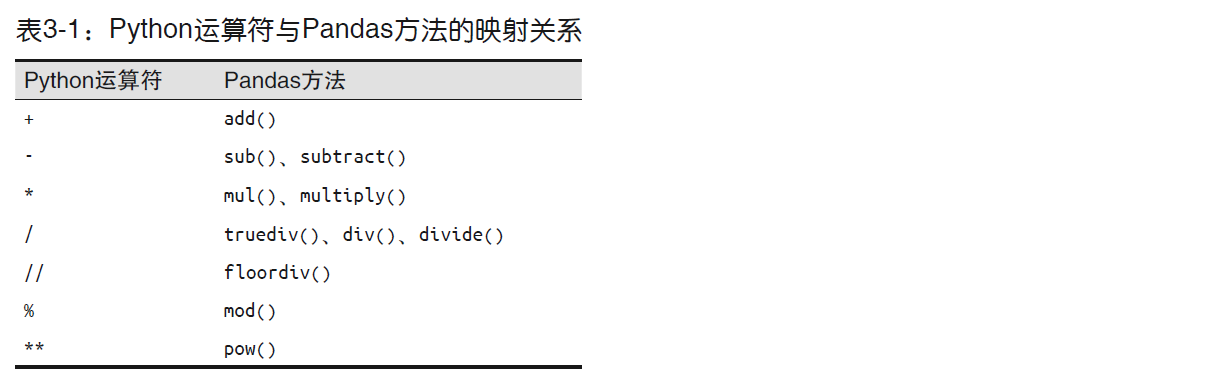

对于缺失位置的数据，Pandas 会用NaN 填充，表示“此处无数”。这是Pandas 表示缺失值的方法

In [78]:
area= pd.Series({'Alaska': 1723337, 'Texas': 695662,'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127}, name='population')
population / area #会根据索引自动对齐计算，如果有缺失值用NaN表示

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [79]:
A = pd.Series([4, 6, 2], index=[1, 2, 0])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A.add(B, fill_value=0) #A.add(B)等价于A + B，可以设置参数fill_value设置自定义补全缺失的数据进行计算

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [80]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),columns=['A','B']) #列的第一种写法
A

,A,B
0,1,11
1,5,1


In [81]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),columns=list('BAC')) #列的第二种写法
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [82]:
A + B #会根据索引自动对齐计算，如果有缺失值用NaN表示

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [83]:
fill = A.stack().mean()#用A中所有值的均值来填充缺失值（计算A的均值需要用stack将二维数组压缩成一维数组）：
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


## DataFrame与Series的运算

下面是numpy的广播规则，利用广播规则在不同维度数组之间运算需要补齐数组

In [84]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [85]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

在Pandas 里规则与之类似

In [86]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0] #df减去索引的df第一行，要将df的第一行进行广播

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [87]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [88]:
df.subtract(df['R'], axis=0) #subtract减法运算，df减去df的第R列，按列进行广播并相减

#df['R']索引写法还可以写成：df.loc[:, 'R']
#用索引器loc和iloc时，行列都必须要写

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [89]:
halfrow = df.iloc[0, ::2] #索引df的第一行数据中从第一个数字开始每隔一个取一个
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [90]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# 处理缺失值

我们将在本节介绍一些处理缺失值的通用规则，Pandas 对缺失值的表现形式，并演示
Pandas 自带的几个处理缺失值的工具的用法。本节以及全书涉及的缺失值主要有三种形
式：null、NaN 或NA。

**None：Python对象类型的缺失值**

Pandas 可以使用的第一种缺失值标签是None，它是一个Python 单体对象，经常在代码中
表示缺失值。由于None 是一个Python 对象，所以不能作为任何NumPy / Pandas 数组类型
的缺失值，只能用于'object' 数组类型（即由Python 对象构成的数组）：

In [91]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

这里dtype=object 表示NumPy 认为由于这个数组是Python 对象构成的，因此将其类型
判断为object。虽然这种类型在某些情景中非常有用，对数据的任何操作最终都会在
Python 层面完成，但是在进行常见的快速操作时，这种类型比其他原生类型数组要消耗
更多的资源：

使用Python 对象构成的数组就意味着如果你对一个包含None 的数组进行累计操作，如sum() 或者min()，那么通常会出现类型错误，在Python 中没有定义整数与None 之间的加法运算。

**NaN：数值类型的缺失值**

另一种缺失值的标签是NaN（全称Not a Number，不是一个数字），是一种按照IEEE 浮点数标准设计、在任何系统中都兼容的特殊浮点数：

In [92]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

NumPy 会为这个数组选择一个原生浮点类型，这意味着和之前的object 类型数组不同，这个数组会被编译成C代码从而实现快速操作

可以把NaN 看作是一个数据类病毒——它会将与它接触过的数据同化。无论和NaN 进行何种操作，最终结果都是NaN

NaN 是一种特殊的浮点数，不是整数、字符串以及其他数据类型

In [93]:
1 + np.nan #无论和NaN进行何种操作，最终结果都是NaN

nan

In [94]:
#NumPy 也提供了一些特殊的累计函数，它们可以忽略缺失值的影响：

np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

**Pandas中NaN与None的差异**

虽然NaN 与None 各有各的用处，但是Pandas 把它们看成是可以等价交换的，在适当的时候会将两者进行替换：

In [95]:
pd.Series([1, np.nan, 2, None]) #除了将整型数组的缺失值强制转换为浮点数，Pandas 还会自动将None 转换为NaN

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

需要注意的是，Pandas 中字符串类型的数据通常是用object 类型存储的

# 层级索引

## 多级索引Series

我们也经常会遇到存储多维数据的需求，数据索引超过一两个键。实践中，更直观的形式是通过层级索引配合多个有不同等级（level）的一级索引一起使用，这样就可以将高维数组转换成类似一维Series和二维DataFrame 对象的形式

In [96]:
import pandas as pd
import numpy as np

笨办法：

假设你想要分析美国各州在两个不同年份的数据。如果你用前面介绍的Pandas 工具来处理，那么可能会用一个Python 元组来表示索引：

In [97]:
index = [('California', 2000), ('California', 2010),('New York', 2000), ('New York', 2010),('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,18976457, 19378102,20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [98]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [99]:
pop[[i for i in pop.index if i[1] == 2000]] #选择所有2000 年的数据

(California, 2000)    33871648
(New York, 2000)      18976457
(Texas, 2000)         20851820
dtype: int64

**好办法：Pandas多级索引**

Pandas的MultiIndex 类型提供了更丰富的操作方法。我们可以用元组创建一个多级索引，如下所示：

In [100]:
index = [('California', 2000), ('California', 2010),('New York', 2000), ('New York', 2010),('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index) # 基于元组创建一个多层索引
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [101]:
#前两列表示Series 的多级索引值，第三列是数据
#有些行仿佛缺失了第一列数据——这其实是多级索引的表现形式，每个空格与上面的索引相同
pop = pd.Series(populations, index=index) #传入上面创建好的多层索引，建立一个Series
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

**多层索引中四种索引方法之比较**

In [102]:
# 用loc索引器，可以筛选带字符的数据，显式索引
# 逗号分割的是维度，这里没有行列的维度，但是因为是多层索引，逗号前是第一个维度（州），然后是第二个维度（年份）

pop.loc[:, 2010] 

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [103]:
# iloc索引器，隐式索引，从第2行开始每隔一行取一个

pop.iloc[1::2] 

California  2010    37253956
New York    2010    19378102
Texas       2010    25145561
dtype: int64

In [104]:
#直接用数组中可用的切片方法索引 
#双重索引的双维度切片

pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [105]:
#直接用数组中可用的切片方法索引
#按行索引，从第2行开始每隔一行取一个

pop[1::2]

California  2010    37253956
New York    2010    19378102
Texas       2010    25145561
dtype: int64

我们其实完全可以**用一个带行列索引的简单DataFrame 代替前面的多级索引**。其实Pandas 已经实现了类似的功能。

**unstack() 方法可以快速将一个多级索引的Series 转化为普通索引的DataFrame**

**stack() 方法可以将一个普通索引的DataFrame转化为一个多级索引的Series**

In [106]:
pop_df = pop.unstack() #pop是在上面的代码块中建立好的多层索引series
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [107]:
pop_df.stack() 

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [108]:
pop_df = pd.DataFrame({'total': pop,'under18': [9267089, 9284094,4687374, 4318033,5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [109]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## 多级索引的创建方法

**最直接的办法：将index参数设置为至少二维的索引数组、将元组作为键的字典传递给Pandas**

In [110]:
#为Series或 DataFrame创建多级索引最直接的办法就是将index参数设置为至少二维的索引数组

df = pd.DataFrame(np.random.rand(4, 2),index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],columns=['data1', 'data2'])
df

data1     data2
a 1  0.113514  0.664328
  2  0.011953  0.378772
b 1  0.826668  0.689523
  2  0.531652  0.985223

In [111]:
#将元组作为键的字典传递给Pandas， Pandas 也会默认转换为MultiIndex：

data = {('California', 2000): 33871648,('California', 2010): 37253956,('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,('New York', 2000): 18976457,('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

**显式地创建多级索引**

In [112]:
#根据元素的位置，将数组一一对应形成组合，作为多级索引

pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [113]:
#列表中的每一个元组，作为多级索引

pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [114]:
#两个索引的笛卡尔积（Cartesian product）创建MultiIndex
#将两个列表（或元组）中的每个元素，逐一遍历形成的组合，作为索引

pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

在创建Series 或DataFrame 时，可以将这些对象作为index 参数，或者通过reindex 方法
更新Series 或DataFrame 的索引。

**多级索引的等级名称**

给MultiIndex 的等级加上名称会为一些操作提供便利。你可以在前面任何一个MultiIndex
构造器中通过names 参数设置等级名称，也可以在创建之后通过索引的names 属性来修改
名称：

In [115]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

**多级列索引**

In [116]:
#多级行列索引
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],names=['year', 'visit']) #创建多级行索引
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],names=['subject', 'type']) #创建多级列索引 

#模拟数据
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

#创建DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.2  34.0  39.9  31.0  36.6
     2      27.0  38.0  37.0  37.5  34.0  36.9
2014 1      28.0  36.9  20.0  39.0  20.0  38.0
     2      37.0  36.2  32.0  38.0  47.0  37.2

In [117]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      34.0  39.9
     2      37.0  37.5
2014 1      20.0  39.0
     2      32.0  38.0

## 多级索引的取值与切片

**Series多级索引**

In [118]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [119]:
#对Series多级索引的取值方法

pop['California', 2000]

33871648

In [120]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [121]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [122]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [123]:
pop[pop > 22000000] #通过布尔掩码选择数据

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [124]:
pop[['California', 'Texas']] #用花哨的索引选择数据

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

**DataFrame多级索引**

In [125]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.2  34.0  39.9  31.0  36.6
     2      27.0  38.0  37.0  37.5  34.0  36.9
2014 1      28.0  36.9  20.0  39.0  20.0  38.0
     2      37.0  36.2  32.0  38.0  47.0  37.2

In [126]:
health_data['Guido', 'HR']

year  visit
2013  1        34.0
      2        37.0
2014  1        20.0
      2        32.0
Name: (Guido, HR), dtype: float64

In [127]:
health_data.iloc[:2, :2] #隐式索引，右侧是开区间

subject      Bob      
type          HR  Temp
year visit            
2013 1      45.0  37.2
     2      27.0  38.0

In [128]:
health_data.loc[:, ('Bob', 'HR')] #索引所有的行；列也是多层索引，先索引Bob中所有的列，再其中HR的列

year  visit
2013  1        45.0
      2        27.0
2014  1        28.0
      2        37.0
Name: (Bob, HR), dtype: float64

loc函数内不允许直接进行colons操作，下面这样索引会报错

#dataframe中不能直接用[(:, 1),(:,'HR')],写上冒号或者去掉冒号都会错误

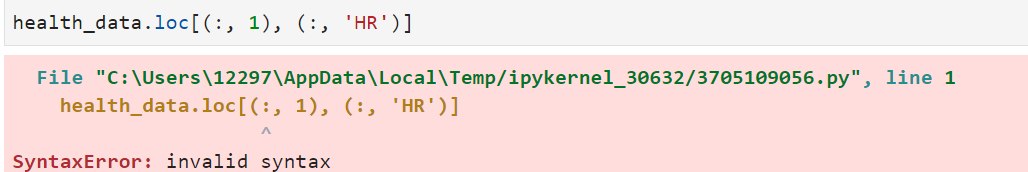

In [129]:
#IndexSlice 实际上是一个方便的索引方法，用了这个方法，可以直接在df中用冒号，也可以删去某一个冒号等
#在loc()方法中要索引的行和列的方括号前传入IndexSlice()方法

idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[: , 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,45.0,34.0,31.0
2014,1,28.0,20.0,20.0


In [130]:
index1 = range(0,3)
index2 = list('ab')
index3 = ['I', 'II']
index0 = pd.MultiIndex.from_product([index1, index2,index3])
df = pd.DataFrame(
    np.random.random([len(index0),2]), 
    index=index0, 
    columns=['col1', 'col2'])
df.head(12)

col1      col2
0 a I   0.568047  0.687467
    II  0.205148  0.032553
  b I   0.114243  0.231704
    II  0.138552  0.966020
1 a I   0.141920  0.684932
    II  0.212900  0.751509
  b I   0.265003  0.244767
    II  0.965945  0.599477
2 a I   0.062855  0.170935
    II  0.574126  0.063871
  b I   0.647127  0.435358
    II  0.369961  0.328849

In [131]:
idx = pd.IndexSlice
df.loc[idx[0:1, 'a':'b'],['col1']] 

col1
0 a I   0.568047
    II  0.205148
  b I   0.114243
    II  0.138552
1 a I   0.141920
    II  0.212900
  b I   0.265003
    II  0.965945

## 多级索引行列转换

**有序的索引和无序的索引**

如果MultiIndex 不是有序的索引，那么大多数切片操作都会失败

In [132]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.309231
      2      0.162706
c     1      0.564039
      2      0.812617
b     1      0.812782
      2      0.487375
dtype: float64

上面的索引不是有序排列的，a,c,b不是字母表正确的排列顺序，这里如果用切片索引的话就肯定会出错

In [133]:
# 对无序的索引进行排序

data = data.sort_index()
data

char  int
a     1      0.309231
      2      0.162706
b     1      0.812782
      2      0.487375
c     1      0.564039
      2      0.812617
dtype: float64

In [134]:
#对有序索引进行局部切片，就正常了

data['a':'b'] 

char  int
a     1      0.309231
      2      0.162706
b     1      0.812782
      2      0.487375
dtype: float64

**索引stack与unstack**

In [135]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [136]:
#unstack()方法将一个多级索引数据集转换成简单的二维形式
#通过level参数设置转换的索引层级
#level=0实际上就是把第一列州变成行，level=1实际上就是把第二列年份变成行

pop.unstack(level=0) 

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [137]:
pop.unstack(level=1) 

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [138]:
pop_df

total  under18
state      year                   
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [139]:
#stack()方法将一个二维形式的数据转换为多级索引

pop_df.stack(level=0) #通过level参数设置转换的索引层级

state       year         
California  2000  total      33871648
                  under18     9267089
            2010  total      37253956
                  under18     9284094
New York    2000  total      18976457
                  under18     4687374
            2010  total      19378102
                  under18     4318033
Texas       2000  total      20851820
                  under18     5906301
            2010  total      25145561
                  under18     6879014
dtype: int64

**索引的设置与重置**

层级数据维度转换的另一种方法是行列标签转换，可以通过reset_index 方法实现。如果在上面的人口数据Series 中使用该方法，则会生成一个列标签中包含之前行索引标签state 和year 的DataFrame。也可以用数据的name 属性为列设置名称：

In [140]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [141]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## 多级索引的数据累计方法

mean()、sum() 和max()。而对于层级索引数据，可以设置参数level 实现对数据子集的累计操作。

In [142]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.2  34.0  39.9  31.0  36.6
     2      27.0  38.0  37.0  37.5  34.0  36.9
2014 1      28.0  36.9  20.0  39.0  20.0  38.0
     2      37.0  36.2  32.0  38.0  47.0  37.2

In [143]:
#如果需要计算每一年各项指标的平均值，那么可以将参数level设置为索引year：

data_mean = health_data.mean(axis=0,level='year') #axis 默认等于0，不写即默认
data_mean

C:\Users\12297\AppData\Local\Temp/ipykernel_6080/2273740461.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(axis=0,level='year') #axis 默认等于0，不写即默认


subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     36.0  37.60  35.5  38.7  32.5  36.75
2014     32.5  36.55  26.0  38.5  33.5  37.60

In [144]:
#如果再设置axis参数，就可以对列索引进行类似的累计操作了：

data_mean.mean(axis=1, level='type') #设置axi=1,对行的数据进行平均数计算

C:\Users\12297\AppData\Local\Temp/ipykernel_6080/1460469770.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level='type') #设置axi=1,对行的数据进行平均数计算


type,HR,Temp
year,,
2013,34.666667,37.683333
2014,30.666667,37.550000


# 合并数据集：Concat与Append操作

In [145]:
import pandas as pd
def make_df(cols, ind):
    """一个简单的DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [146]:
# DataFrame示例
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


## numpy数组的合并

In [147]:
#concatenat合并numpy数组

import numpy as np

x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [148]:
x = [[1, 2],[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [149]:
#用concat合并Series，沿横向的方向向下合并

ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

## concat函数合并Series和DataFrame

In [150]:
#用concat合并DataFrame

df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2)
pd.concat([df1, df2])#默认aix=0，即按行

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [151]:
#用concat合并DataFrame，沿纵向的方向向右合并

df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); 
pd.concat([df3, df4], axis=1)

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


**如上，concat函数默认允许合并后的索引是重复的**

介绍一种发现索引重复的错误的方法：设置**verify_integrity 参数**

In [152]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # 复制索引
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [153]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


如发现重复，有以下两个解决方案：1、**设置ignore_index 参数，忽略旧索引并创建全新的索引；2、**通过keys 参数**为数据源设置多级索引标签

In [154]:
#设置ignore_index 参数

print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [155]:
#增加多级索引

print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


在实际工作中，需要合并的数据往往带有不同的列名，而pd.concat 提供了一些选项来解决这类合并问题。

In [156]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6);
pd.concat([df5, df6])

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


默认情况下，某个位置上缺失的数据会用NaN 表示。如果不想这样，可以用**join 和join_axes 参数**设置合并方式。默认的合并方式是对所有输入列进行**并集合并（join='outer'）**，当然也可以用**join='inner' 实现交集合并**：

In [157]:
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


## append方法

与Python 列表中的append() 和extend() 方法不同，Pandas 的append() 不
直接更新原有对象的值，而是为合并后的数据创建一个新对象。因此，它不能被称之为一
个非常高效的解决方案，因为每次合并都需要重新创建索引和数据缓存

In [158]:
print(df1); print(df2);
df1.append(df2)

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


# 合并数据集：合并与连接

## merge 函数进行数据集的连接

**【python】详解pandas库的pd.merge函数**

**https://blog.csdn.net/brucewong0516/article/details/82707492**

**on参数**可以指定根据共同列合并的列名。但是如果两个数据集只有一个共同列，不用on参数时，系统会默认以唯一共同列合并

可以用**left_on 和right_on参数**来指定列名，合并两个列名不同的数据集

一般情况下，只有共同列才可以合并，但**left_index和right_index参数**将索引设置为键来实现合并

In [159]:
#一对一连接
#pd.merge() 会默认丢弃原来的行索引，但会自动对齐可能不一致的共同列

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

#on参数可以指定根据共同列合并的列名。但是如果两个数据集只有一个共同列，不用on参数时，系统会默认以唯一共同列合并。
df3=pd.merge(df1, df2,on='employee') 
df3

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [160]:
#多对一连接：多对一连接是指，在需要连接的两个列中，有一列的值有重复

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4)
pd.merge(df3, df4)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [161]:
#多对多连接：左右两个输入的共同列都包含重复值，那么合并的结果就是一种多对多连接。

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
print(df1); print(df5); 
pd.merge(df1, df5)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [162]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3)

#合并两个列名不同的数据集，可以用left_on 和right_on 参数来指定列名：
pd.merge(df1, df3, left_on="employee", right_on="name")

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [163]:
#获取的结果中会有一个多余的列，可以通过DataFrame的drop()方法将这列去掉

df52=pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

**set_index方法可以将DataFrame列中的内容指定为索引**

In [164]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [165]:
#left_index和right_index参数将索引设置为键来实现合并

pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [166]:
#DataFrame 实现了join() 方法，它可以按照索引进行数据合并，能实现和上面同样的效果

print(df1a); print(df2a)
df1a.join(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [167]:
#如果想将索引与列混合使用，那么可以通过结合left_index与right_on,或者结合left_on与right_index 来实现：

print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [168]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [169]:
# how='outer'参数：外连接（保留并集），相对而言，how='inner'参数：内连接（保留交集）
# left_on数据1最左边的列,right_on数据2最左边的列，然后将两者合并

mergedata = pd.merge(pop, abbrevs, how='outer',left_on='state/region', right_on='abbreviation')#默认是内连接，所以为防止数据缺失要增加参数
mergedata.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [170]:
# merged.drop（'丢弃的列名'，aix=1表示沿纵轴丢弃）方法丢弃合并后的多余的行，

mergedata = mergedata.drop('abbreviation', axis=1) #丢弃重复的列
mergedata.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


**pandas中.isnull().any()含义**

**https://blog.csdn.net/Mr_HHH/article/details/79488517**

pandas判断缺失值一般采用 isnull()，然而生成的却是所有数据的true／false矩阵。

df.isnull().any()则会判断哪些”列”存在缺失值。

df.isnull().values==True可以只显示存在缺失值的行列，清楚的确定缺失值的位置。

In [171]:
#看看哪些列有缺失值（有缺失值的列会显示布尔值True）

mergedata.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [172]:
#仔细查看究竟哪些数据是缺失的
# mergedata['population'].isnull()生成mergedata中'population'列缺失与否的布尔值矩阵，再用mergedata[]索引出缺失的数据

mergedatalost=mergedata[mergedata['population'].isnull()]
mergedatalost.head() #显示前5行

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


**Pandas中的unique()和nunique()方法**

https://blog.csdn.net/yeshang_lady/article/details/105345653

In [173]:
#索引出所有的缺失'state'的行并选出所有的'state/region'列
# unique()方法：去除重复值（可能每个州缺失很多次，这里只要看哪些州缺失了就行）

mergedata.loc[mergedata['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [174]:
#人口数据中包含波多黎各（PR）和全国总数（USA），但这两项没有出现在州名称缩写表中

mergedata.loc[mergedata['state/region'] == 'PR', 'state'] = 'Puerto Rico'
mergedata.loc[mergedata['state/region'] == 'USA', 'state'] = 'United States'
mergedata.isnull().any() #看看哪些列有缺失值，这里state不缺失了，而popluation仍然缺失

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [175]:
#将mergedata与地区面积合并
#how='left'不能随便去掉，去掉之后好像会丢失数据。left表示只使用左边的数据的键，而mergedata左边的州不缺失，按照左边的键拼接就可以了。

#on='state'不能随便去掉，去掉之后也会丢失数据。
#on参数代表要加入的列或索引级别名称。必须在左侧和右侧DataFrame对象中找到。
#如果果未传递on且left_index和right_index为False，则DataFrame中的列的交集将被推断为连接键。

final = pd.merge(mergedata, areas, on='state', how='left') 
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [176]:
print(final)

     state/region     ages  year   population          state  area (sq. mi)
0              AL  under18  2012    1117489.0        Alabama        52423.0
1              AL    total  2012    4817528.0        Alabama        52423.0
2              AL  under18  2010    1130966.0        Alabama        52423.0
3              AL    total  2010    4785570.0        Alabama        52423.0
4              AL  under18  2011    1125763.0        Alabama        52423.0
...           ...      ...   ...          ...            ...            ...
2539          USA    total  2010  309326295.0  United States            NaN
2540          USA  under18  2011   73902222.0  United States            NaN
2541          USA    total  2011  311582564.0  United States            NaN
2542          USA  under18  2012   73708179.0  United States            NaN
2543          USA    total  2012  313873685.0  United States            NaN

[2544 rows x 6 columns]


In [177]:
#看看哪些列有缺失值（有缺失值的列会显示布尔值True）

final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [178]:
#isnull()方法意为找出缺失的数据
#这里不太清楚是什么意思？

final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [179]:
#通过行列索引同样也能实现上面的功能

final.loc[final['area (sq. mi)'].isnull()==True, 'state'].unique()

array(['United States'], dtype=object)

**Pandas的dropna()方法-丢弃含空值的行、列**

https://blog.csdn.net/qq_17753903/article/details/89817371

In [180]:
#dropna()方法丢弃含空值的行列，inplace：是否原地替换

final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [181]:
data2010 = final.query("year == 2010 & ages == 'total'")

In [182]:
data2010.set_index('state', inplace=True) #将'state'作为索引项
density = data2010['population'] / data2010['area (sq. mi)'] #计算人口密度

In [183]:
density.sort_values(ascending=False, inplace=True) #按值排序
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [184]:
#tail()方法一般用来对数据集进行矩阵形式的显示，默认显示为数据集的最后5行。

density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# 累计与分组

In [185]:
planets=pd.read_csv(r'C:\Users\12297\python学习\python数据分析\seaborn文件\planets.csv')
planets.shape

(1035, 6)

In [186]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Pandas的简单累计功能

In [187]:
#生成随机数

rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [188]:
ser.sum() #求和

2.811925491708157

In [189]:
ser.mean() #求均值

0.5623850983416314

In [190]:
#创建DataFrame

df = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [191]:
df.mean() #计算每一列的均值

A    0.477888
B    0.443420
dtype: float64

In [192]:
df.mean(axis=1) #默认axis=0(沿着纵向)，axis=1(沿着横向)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [193]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


**pandas累计方法**

count()、first()、last()、mean()、median() min()、max()、std()、var()、均值绝对偏差：mad()、prod()、所有项乘积：sum()

## GroupBy：分割、应用和组合

In [194]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [195]:
#这里的返回值不是一个 DataFrame 对象，而是一个DataFrameGroupBy对象。里面隐藏着若干组数据，但是在没有应用累计函数之前不会计算。

df.groupby('key')

In [196]:
#sum()只是众多可用方法中的一个，可以用Pandas或NumPy的任意一种累计函数

df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### GroupBy对象

In [197]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [198]:
planets.groupby('method')

In [199]:
planets.groupby('method')['orbital_period']

In [200]:
#按照'method'列分组进行groupby，且分组后只计算'orbital_period'列下的中位数

planets.groupby('method')['orbital_period'].median() #不同'method'下所有行星公转周期（按天计算）的中位数

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [201]:
#如果不加['orbital_period'],就是对'method'分组后对所有的列都算中位数

planets.groupby('method').median() 

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.0,631.180000,NaN,17.875,2011.5
Eclipse Timing Variations,2.0,4343.500000,5.125,315.360,2010.0
Imaging,1.0,27500.000000,NaN,40.395,2009.0
Microlensing,1.0,3300.000000,NaN,3840.000,2010.0
Orbital Brightness Modulation,2.0,0.342887,NaN,1180.000,2011.0
Pulsar Timing,3.0,66.541900,NaN,1200.000,1994.0
Pulsation Timing Variations,1.0,1170.000000,NaN,NaN,2007.0
Radial Velocity,1.0,360.200000,1.260,40.445,2009.0
Transit,1.0,5.714932,1.470,341.000,2012.0


In [202]:
#按组迭代

for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape)) #format是格式化函数，设置格式

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


## 累计、过滤、转换和应用

In [203]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data1': range(6),'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### 累计

In [204]:
#aggregate() 其实可以支持更复杂的操作，比如字符串、函数或者函数列表，并且能一次性计算所有累计值

df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [205]:
df.groupby('key').aggregate({'data1': min,'data2': max})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### 过滤

In [206]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [207]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [208]:
# 过滤操作可以让你按照分组的属性丢弃若干数据。例如，我们可能只需要保留标准差超过某个阈值的组。

def filter_func(x):
    return x['data2'].std() > 4

In [209]:
#filter()函数会返回一个布尔值，表示每个组是否通过过滤。

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [210]:
#fliter函数：filter(function, sequence)
#对 sequence 中的item 依次执行 function(item)，将结果为 True 的 item 组成一个 List/String/Tuple（取决于 sequence 的类型）并返回

selected_numbers = filter(lambda x: x % 3 == 0, range(1, 11))

### 转换

In [211]:
#数据经过转换之后，其形状与原来的输入数据是一样的。常见的例子就是将每一组的样本数据减去各组的均值，实现数据标准化。

df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### apply() 方法

**pandas apply() 函数用法**

**https://www.jianshu.com/p/4fdd6eee1b06** 

**https://blog.csdn.net/qq_19528953/article/details/79348929**

apply函数：DataFrame.apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)

In [212]:
df['data2']

0    5
1    0
2    3
3    3
4    7
5    9
Name: data2, dtype: int32

In [213]:
#GroupBy里的apply()方法非常灵活，唯一需要注意的地方是它总是输入分组数据的DataFrame，返回Pandas对象或标量。

def norm_by_data2(x):
    x['data1'] /= x['data2'].sum() #这里写了'data1'、'data2'，所以下面不用arg传入位置实参，x在这里是DataFrame的形参
    return x

#用apply()方法将第一列数据以第二列的和为基数进行标准化：
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [214]:
#apply函数的应用 1-1
#疑问：a的作用究竟是什么？去掉不行吗，为什么去掉了之后显示多给了一个实参？
#解答：这里的a只是代表一个Dataframe,a[start]是索引其中a中的start列
#直接在Dataframe中使用apply函数传入自己写的函数时,需要给定一个Dataframe的形参

import datetime as dt

def get_interval_days(a,start, end):   
    start_date = dt.datetime.strptime(a[start],'%Y-%m-%d')
    end_date = dt.datetime.strptime(a[end],'%Y-%m-%d') 
    return (end_date - start_date).days

wbs = {"date_from": ["2019-04-01", "2019-04-07", "2019-05-16","2019-05-20"],
       "date_to": ["2019-05-01", "2019-05-17", "2019-05-31", "2019-06-11"]}

df1 = pd.DataFrame(wbs)

#我们想给自己实现的函数传递参数，就可以用的apply函数的*args参数
#这里使用的是DataFrame的apply()函数，所以需要配置参数args,让程序知道准备将哪些变量相减
#使用 DataFrame.apply() 函数需要先定义一个函数 get_interval_days()，函数的第一列是一个 Series 类型的变量，执行的时候，依次接收 DataFrame的每一行。

df1['elapsed'] = df1.apply(get_interval_days, axis=1,args=('date_from','date_to'))
df1

,date_from,date_to,elapsed
0,2019-04-01,2019-05-01,30
1,2019-04-07,2019-05-17,40
2,2019-05-16,2019-05-31,15
3,2019-05-20,2019-06-11,22


In [215]:
start_date = dt.datetime.strptime('2019-5-20','%Y-%m-%d')
end_date = dt.datetime.strptime('2019-6-11','%Y-%m-%d') 
a=(end_date - start_date).days
a

22

In [216]:
#apply函数的应用 1-2
#可见，最好还是别用DataFrame的apply函数，太复杂

wbs = {"wbs": ["job1", "job2", "job3", "job4"],
       "date_from": ["2019-04-01", "2019-04-07", "2019-05-16","2019-05-20"],
       "date_to": ["2019-05-01", "2019-05-17", "2019-05-31", "2019-06-11"]}

df2 = pd.DataFrame(wbs)

elapsed= df2['date_to'].apply(pd.to_datetime) - df2['date_from'].apply(pd.to_datetime)
df2['elapsed'] = elapsed.apply(lambda x : x.days) #去掉days
df2

,wbs,date_from,date_to,elapsed
0,job1,2019-04-01,2019-05-01,30
1,job2,2019-04-07,2019-05-17,40
2,job3,2019-05-16,2019-05-31,15
3,job4,2019-05-20,2019-06-11,22


In [217]:
#apply函数的应用 2

import pandas as pd
import numpy as np

matrix = [[1,2,3],[4,5,6],[7,8,9]]
df2 = pd.DataFrame(matrix, columns=list('xyz'), index=list('abc'))
df2

,x,y,z
a,1,2,3
b,4,5,6
c,7,8,9


In [218]:
df2.apply(np.square) #所有的元素都执行平方运算

,x,y,z
a,1,4,9
b,16,25,36
c,49,64,81


In [219]:
df2.apply(lambda x : np.square(x) if x.name=='x' else x) # x 列进行平方运算

,x,y,z
a,1,2,3
b,16,5,6
c,49,8,9


In [220]:
df2.apply(lambda x : np.square(x) if x.name in ['x', 'y'] else x) #对 x 和 y 列进行平方运算

,x,y,z
a,1,4,3
b,16,25,6
c,49,64,9


In [221]:
df2.apply(lambda x : np.square(x) if x.name == 'a' else x, axis=1) #对第一行进行平方运算

,x,y,z
a,1,4,9
b,4,5,6
c,7,8,9


## 设置分割的键

In [222]:
#将列表、数组、Series 或索引作为分组键，分组键可以是长度与DataFrame 匹配的任意Series 或列表
#可知L列表都是要分类的键，一次排列，原来的第1、3、6行算作是0的键，2、4行算作是1的键，第5行是2的键

L = [0, 1, 0, 1, 2, 0]
print(df); 
df.groupby(L).sum()

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9


,data1,data2
0,7,17
1,4,3
2,4,7


In [223]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [224]:
df3 = df.set_index('key')
df3

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [225]:
#用字典或Series 将索引映射到分组名称

mapping = {'A': 'vowel', 'B': 'conson', 'C': 'conson'}
df3.groupby(mapping).sum()

,data1,data2
key,,
conson,12,19
vowel,3,8


In [226]:
#可以将任意Python 函数传入groupby，函数映射到索引，然后新的分组输出

df3.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [227]:
#将字典、列表或函数组合

df3.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,conson,2.5,3.5
c,conson,3.5,6.0


## 案例

In [228]:
decade = 10 * (planets['year'] // 10)  #取整除，向下取整
decade = decade.astype(str) + 's'
decade.name = 'decade'

#fillna()将缺失值填充为0
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# 数据透视表

数据透视表更像是一种多维的GroupBy 累计操作。虽然也可以分割- 应用- 组合，但是分割与组合不是发生在一维索引上，而是在二维网格上（行列同时分组）

## groupby和crosstab操作

In [229]:
titanic=pd.read_csv(r'C:\Users\12297\python学习\python数据分析\seaborn文件\titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [230]:
#检查哪些列有缺失的数据

titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [231]:
#计算男性和女性各有多少活下来(方法1：groupby中value_counts)

titanic.groupby('sex')['alive'].value_counts()

sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: alive, dtype: int64

In [232]:
#计算男性和女性各有多少活下来(方法2：pd.crosstab列联表)

pd.crosstab(titanic["sex"], titanic["alive"])

alive,no,yes
sex,,
female,81,233
male,468,109


In [233]:
#计算男性和女性的生还率（生存为1，死亡为0，通过计算均值计算生还率）

titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [234]:
#观察不同性别与船舱等级的生还率(方法1：pd.crosstab列联表)
#aggfunc参数传递的是'count'方法

pd.crosstab(index=titanic["sex"],columns=titanic["pclass"],values=titanic["survived"],aggfunc='mean',margins=True)

pclass,1,2,3,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [235]:
#观察不同性别与船舱等级的生还情况

pd.crosstab(index=titanic["sex"],columns=titanic["pclass"],values=titanic["alive"],aggfunc='count',margins=True)

pclass,1,2,3,All
sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [236]:
#观察不同性别与船舱等级的生还率(方法2：二维的GroupBy方法)


titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## pivot_table操作

**pandas.pivot_table
(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)**

pivot_table()的本质是对数据进行多维分组并展示。可以一个维度上进行单层（多层）索引的分组，更可以横向纵向两个维度上分别进行单层（多层）索引的分组

pivot_table(值，分类的行（用方括号括起来写多个行即为多层索引，写一个就是单层索引），分类的列（与行同理），计算方法（aggfunc='计算方法'）)

In [237]:
titanic.pivot_table('survived', index='sex', columns='class') 
#index，columns也可以不写
#df.pivot_table(准备分类的值，分类的行，分类的列)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**pandas的cut，qcut函数的使用和区别:https://zhuanlan.zhihu.com/p/68194655**

cut函数是按照值的范围分，可以指定边界，也可以让python自己均匀分界；qcut是按照值的数量分，每组的个数是均匀的。

In [238]:
age = pd.cut(titanic['age'], [0, 18, 80]) #通过pd.cut函数将年龄进行分段
titanic.pivot_table('survived', ['sex', age], 'class') #df.pivot_table(准备分类的值，分类的行，分类的列)

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

**aggfunc 参数用于设置累计函数类型，默认值是均值（mean）。与GroupBy 的用法一样，累计函数可以用一些常见的字符串（'sum'、'mean'、'count'、'min'、'max' 等）表示，也可以用标准的累计函数（np.sum()、min()、sum() 等）表示。**

In [239]:
titanic.pivot_table('alive', ['sex', age], 'class',aggfunc='count') #df.pivot_table(准备分类的值，分类的行，分类的列)

class            First  Second  Third
sex    age                           
female (0, 18]      11      14     43
       (18, 80]     74      60     59
male   (0, 18]       5      15     51
       (18, 80]     96      84    202

In [240]:
#结果是一个带层级索引的四维累计数据表，通过网格显示不同数值之间的相关性

fare = pd.qcut(titanic['fare'], 2) #通过qcut函数将票价均匀分为两段，两段包含的票数一样多，而价格并不均匀分开
titanic.pivot_table('survived', ['sex', age], [fare, 'class']) #df.pivot_table(准备分类的值，分类的行，分类的列)

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

**aggfunc还可以通过字典为不同的列指定不同的累计函数**

In [241]:
#需要注意的是，这里忽略了一个参数values。当我们为aggfunc指定映射关系的时候，待透视的数值就已经确定了。

titanic.pivot_table(index='sex', columns='class',aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [242]:
#需要计算每一组的总数时，可以通过margins 参数来设置

titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## 案例：美国人的生日

In [243]:
birthdata = pd.read_csv(r'C:\Users\12297\python学习\python数据分析\seaborn文件\births.csv')
birthdata.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [244]:
birthdata['decade'] = 10 * (birthdata['year'] // 10) #增加一列表示不同年代
birthdata.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [245]:
birthdata.pivot_table('births', 'decade','gender',aggfunc='sum') #必须写aggfunc='sum'，否则默认是平均数

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

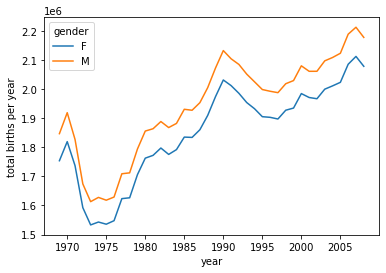

In [246]:
import matplotlib.pyplot as plt

birthdata.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [247]:
#对数据做清理工作，消除由于输错了日期而造成的异常点（如6月31号）或者是缺失值（如1999年6月）。
#消除这些异常的简便方法就是直接删除异常值，可以通过更稳定的sigma 消除法（按照正态分布标准差划定范围，SciPy中默认是四个标准差）操作来实现

quartiles = np.percentile(birthdata['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) #样本均值的稳定性估计,0.74 是指标准正态分布的分位数间距

In [248]:
#query() 方法可以将有效的生日数据筛选出来
birthdata = birthdata.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

#这列数据在筛选之前是字符串，因为数据集中有的列含有缺失值。astype()方法将day列设置为整数
birthdata['day'] = birthdata['day'].astype(int) 

birthdata.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [249]:
# 从年月日创建一个日期索引
# data.index设置索引
# pd.to_datetime批量将数据转为日期格式
#10000*年+100*月+日，可以快速创建要转化的日期格式的数字串

birthdata.index = pd.to_datetime(10000 * birthdata.year +100 * birthdata.month +birthdata.day, format='%Y%m%d')
birthdata.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


DatetimeIndex.dayofweek官方文档解释：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [250]:
#birthdata.index.dayofweek 返回日期中星期几的索引（如1代表星期一）

birthdata['dayofweek'] = birthdata.index.dayofweek
birthdata.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


Text(0, 0.5, 'mean births by day')

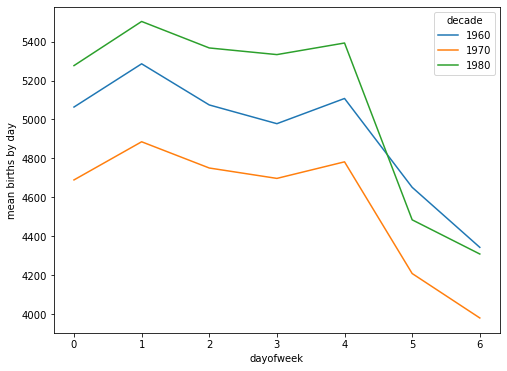

In [251]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pic=birthdata.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean').plot(figsize=(8, 6))
plt.ylabel('mean births by day')

由图可知，周末的出生人数比工作日要低很多

In [252]:
#pivot_table()的本质是对数据进行多维分组并展示#
#可以一个维度上进行单层（多层）索引的分组，更可以横向纵向两个维度上分别进行单层（多层）索引的分组

birthdata_by_date = birthdata.pivot_table('births',[birthdata.index.month, birthdata.index.day])#单维度的多层索引分组
birthdata_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [253]:
birthdata_by_date.index = [pd.datetime(2012, month, day) for (month, day) in birthdata_by_date.index]
birthdata_by_date.head()

C:\Users\12297\AppData\Local\Temp/ipykernel_6080/4117179913.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  birthdata_by_date.index = [pd.datetime(2012, month, day) for (month, day) in birthdata_by_date.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<AxesSubplot:>

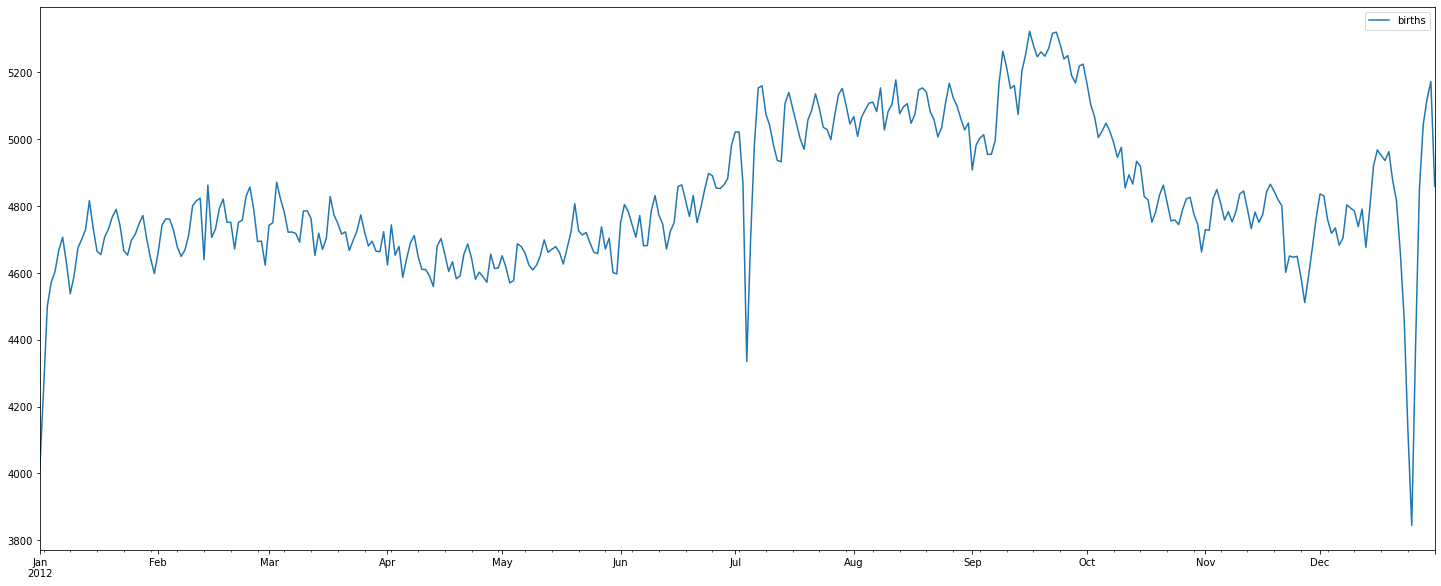

In [254]:
fig, ax = plt.subplots(figsize=(25, 10))
birthdata_by_date.plot(ax=ax)

在美国节假日的时候，出生人数急速下降（例如美国独立日、劳动节、感恩节、圣诞节以及新年）,这种现象可能是由于医院放假导致的接生减少。

# 向量化字符串操作

**pandas官方文档：https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html**

**https://blog.csdn.net/fengdu78/article/details/109882174**

Python内置一系列强大的字符串处理方法，但这些方法只能处理单个字符串，处理一个序列的字符串时，需要用到for循环。那么，有没有办法，不用循环就能同时处理多个字符串呢，pandas的向量化操作就提供了这样的方法。

假如用内置的字符串函数进行操作，需要进行遍历，且Python原生的遍历操作无法处理缺失值。它既可以满足向量化字符串操作的需求，又可以正确地处理缺失值。例如，我们用前面的数据data 创建了一个Pandas 的Series

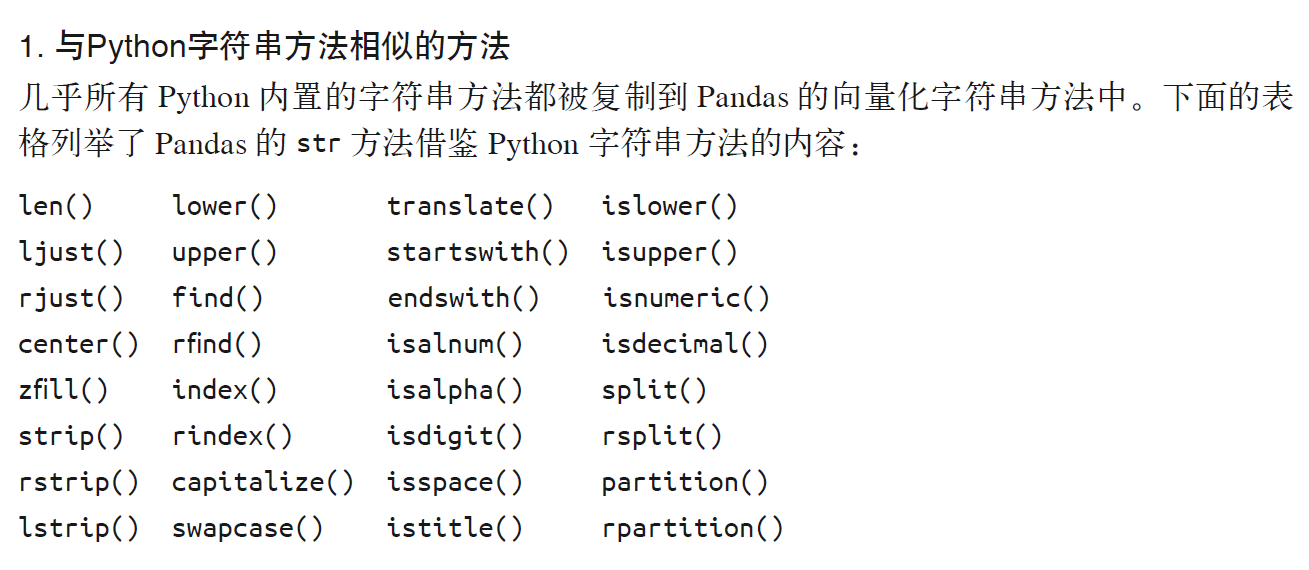

In [2]:
import pandas as pd
data = ['peter', 'Paul', 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [3]:
names.str.capitalize() #可以直接调用转换大写方法capitalize() 将所有的字符串变成大写形式，缺失值会被跳过

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [4]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam','Eric Idle', 'Terry Jones', 'Michael Palin'])

In [5]:
monte.str.lower() #转换为小写

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [6]:
monte.str.len() #计算每个值的字符长度

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [7]:
monte.str.startswith('T') #判断字符串是否以指定字符或子字符串结尾

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [8]:
monte.str.split() #分词

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

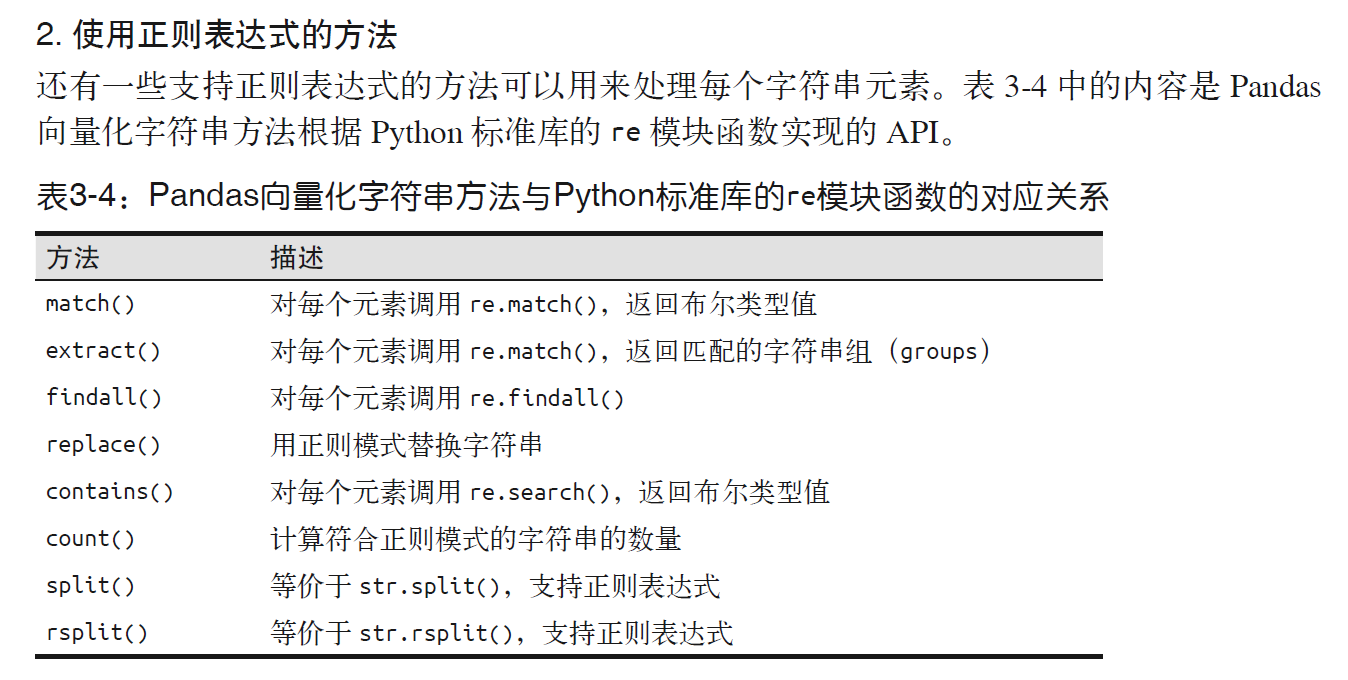

In [13]:
import pandas as pd

monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam','Eric Idle', 'Terry Jones', 'Michael Palin'])
monte.str.extract('([A-Za-z]+)') #提取元素前面的连续字母作为每个人的名字（first name）

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [14]:
#找出所有开头和结尾都是辅音字母的名字——这可以用正则表达式中的开始符号（^）与结尾符号（$）来实现：

monte.str.findall(r'^[^AEIOU].*[^aeiou]$') 

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

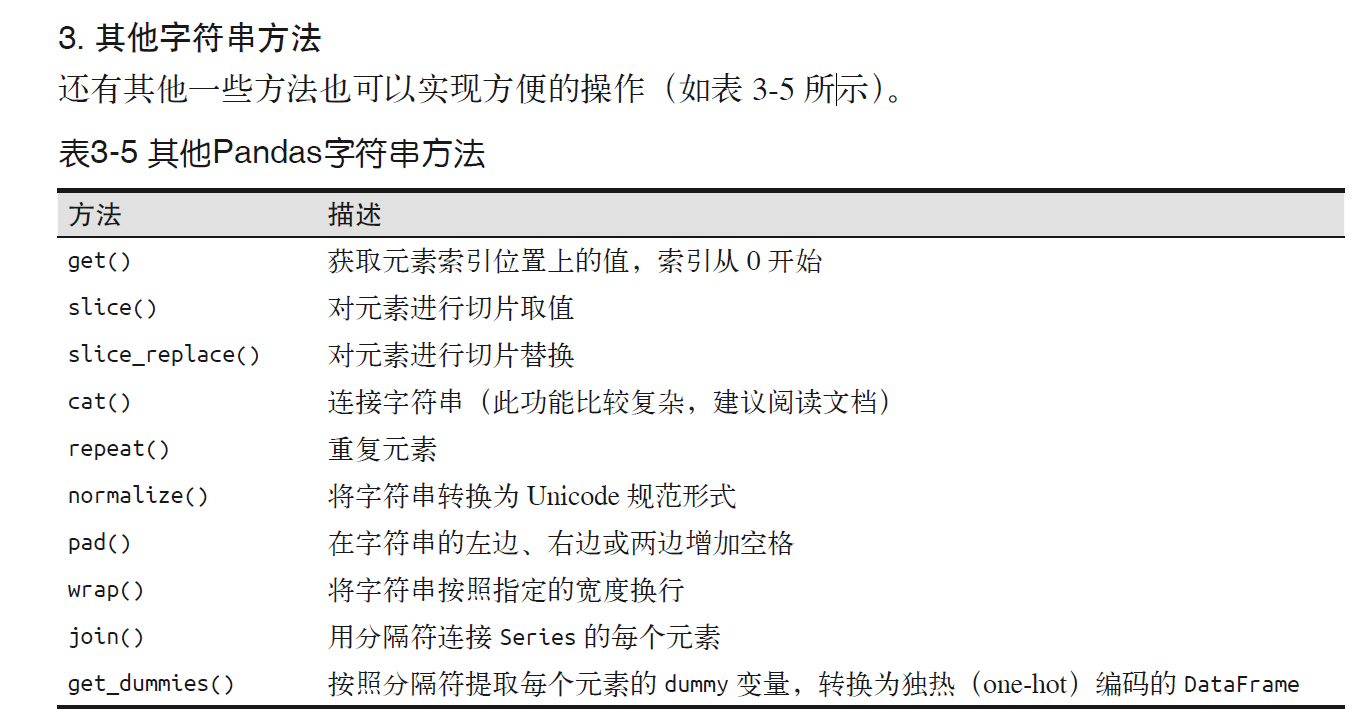

In [33]:
#获取每个字符串数组的前三个字

monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [34]:
#等价于上面的方法，获取每个字符串数组的前三个字

monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [35]:
#获取每个字符串数组的第一个字

monte.str[0]

0    G
1    J
2    T
3    E
4    T
5    M
dtype: object

In [36]:
#等价于上面的方法，获取每个字符串数组的第一个字

monte.str.get(0)

0    G
1    J
2    T
3    E
4    T
5    M
dtype: object

In [38]:
#要获取每个姓名的姓（last name），可以结合使用split() 与get()

monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [41]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C','B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [44]:
#get_dummies() 方法可以让你快速将这些指标变量分割成一个独热编码的DataFrame（每个元素都是0或1）：

full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## 案例：食谱数据库

In [34]:
import pandas as pd
from io import StringIO

#提示数据里有“trailing data”（数据断行）的ValueError 错误

try:
    recipes = pd.read_json('recipeitems.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [40]:
#读取json报错ValueError: Protocol not known解决办法:https://blog.csdn.net/qq814889301/article/details/109601908

with open('recipeitems.json') as f:
    line = f.readline()

pd.read_json(StringIO(line)).shape

(2, 12)

In [46]:
#将文件内容读取成Python数组

with open('recipeitems.json',encoding='utf-8') as f:
    data = (line.strip() for line in f) #提取每一行内容
    data_json = "[{0}]".format(','.join(data)) #将所有内容合并成一个列表
recipes = pd.read_json(StringIO(data_json)) #用JSON形式读取数据
recipes.shape

(173278, 17)

In [55]:
recipes.iloc[0] #随机抽取第一个数据看看

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [69]:
recipes['ingredients'].str.len().describe() #向量化字符的方式描述每个菜谱所需食材的文本长度

#也可写作：recipes.ingredients.str.len().describe() 

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [70]:
import numpy as np

#看看这个拥有最长食材列表的究竟是哪道菜
#argmax返回最大值的索引
#name是数据中的标签名，数据.标签名也是索引数据的方式之一

recipes.name[np.argmax(recipes.ingredients.str.len())] 

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [78]:
#name是数据中的标签名，数据.标签名也是索引数据的方式之一
# '[Bb]reakfast'中[Bb]的意思是开头大小写都行

recipes.description.str.contains('[Bb]reakfast').sum() #看看哪些食谱是早餐

3524

In [77]:
#看看有多少食谱用肉桂（cinnamon）作为食材
#name是数据中的标签名，数据.标签名也是索引数据的方式之一
# '[Cc]innamon'中[Cc]的意思是开头大小写都行

recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [82]:
#看看究竟是哪些食谱里把肉桂错写成了“cinamon”

recipes.ingredients.str.contains('[Cc]inamon').sum()

11

In [83]:
#列举常用的香料和调味料

spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley','rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [85]:
#通过一个由True 与False 构成的布尔类型的DataFrame 来判断食材是否出现在某个食谱中

import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [86]:
#找一份使用了欧芹（parsley）、辣椒粉（paprika）和龙蒿叶（tarragon）这三种食材的食谱

selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [96]:
#找到了十份同时包含这三种食材的食谱，让我们用索引看看究竟是哪些食谱

recipes['name'][selection.index]
#也可写作：recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

# 处理时间序列

Python 的datetime 文档：https://docs.python.org/3/library/datetime.html

dateutil 的在线文档：http://labix.org/python-dateutil

NumPy 的datetime64 文档：https://numpy.org/doc/stable/reference/arrays.datetime.

### 原生Python的日期与时间工具：datetime与dateutil

In [7]:
from datetime import datetime

#用datetime 类型创建一个日期：
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [8]:
from dateutil import parser

date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [5]:
#判断是星期几

date.strftime('%A')

'Saturday'

### 时间类型数组：NumPy的datetime64类型

In [13]:
import numpy as np

date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [11]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [12]:
#以天为精度

np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [ ]:
#以分钟为精度

np.datetime64('2015-07-04 12:00')

### Pandas的日期与时间工具：理想与现实的最佳解决方案

Pandas 所有关于日期与时间的处理方法全部都是通过Timestamp 对象实现的，它利用numpy.datetime64 的有效存储和向量化接口将datetime 和dateutil 的易用性有机结合起
来。Pandas 通过一组Timestamp 对象就可以创建一个可以作为Series 或DataFrame 索引的DatetimeIndex

**pd.to_datetime()官方文档：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html**

**pd.to_datetime()将参数转换为日期时间**

In [15]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [44]:
#pd.to_datetime()将参数转换为日期时间

pd.to_datetime('1/9/2018')

Timestamp('2018-01-09 00:00:00')

In [39]:
pd.to_datetime('2018-07-11')

Timestamp('2018-07-11 00:00:00')

In [37]:
pd.to_datetime('2018, 1, 10')

Timestamp('2018-01-10 00:00:00')

In [45]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [50]:
pd.to_datetime('20170322151645') #注意！字符串要加引号，否则报错

Timestamp('2017-03-22 15:16:45')

In [43]:
#获取现在的时间
pd.to_datetime(time.asctime())

Timestamp('2022-03-08 23:40:21')

In [16]:
date.strftime('%A')

'Saturday'

**Timedelt教程：https://blog.csdn.net/fangbbbbbb/article/details/100535401**

In [59]:
#2个Datetime数据运算相减得出的结果就是一个Timedelta数据类型
#Timedeltas是时间的绝对差异，以不同的单位（例如天，小时，分钟，秒）表示

pd.to_datetime('2019-9-4') - pd.to_datetime('2018-1-1')

Timedelta('611 days 00:00:00')

In [91]:
pd.to_timedelta('1 days 06:05:01')

Timedelta('1 days 06:05:01')

In [8]:
#计算我现在的年龄
import pandas as pd
import numpy as np
from datetime import datetime

age = (datetime.now() - pd.to_datetime('1999-4-13')) / pd.Timedelta(days=365.24)
print(age)

22.90705396563358


In [9]:
#pd.to_timedelta方法将参数从公认的 timedelta 格式/值转换为 Timedelta 类型。
#date是一个时间戳，时间戳（2015-07-04）加上时间间隔（1天），创造出来一个日期戳列表（有12个日期）

date = pd.to_datetime("4th of July, 2015")
date + pd.to_timedelta(np.arange(12), 'd') 

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas时间序列：用时间作索引

In [2]:
import pandas as pd

index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [3]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [5]:
#直接通过年份切片获取该年的数据

data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas时间序列数据结构

针对时间戳数据，Pandas 提供了Timestamp 类型，对应的索引数据结构是DatetimeIndex。

针对时间周期数据，Pandas 提供了Period 类型，对应的索引数据结构是PeriodIndex。

针对时间增量或持续时间，Pandas 提供了Timedelta 类型，对应的索引数据结构是TimedeltaIndex。

**最基础的日期/ 时间对象是Timestamp 和DatetimeIndex。这两种对象可以直接使用。**

**最常用的方法是pd.to_datetime() 函数，它可以解析许多日期与时间格式。对pd.to_datetime() 传递一个日期会返回一个Timestamp 类型，传递一个时间序列会返回一个DatetimeIndex 类型。**

In [10]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

**任何DatetimeIndex 类型都可以通过to_period() 方法和一个频率代码转换成PeriodIndex类型。下面用'D' 将数据转换成单日的时间序列**

In [11]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [16]:
# 当用一个日期减去另一个日期时，返回的结果是TimedeltaIndex 类型

dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [17]:
#调用days方法将TimedeltaIndex格式转换为整数


(dates - dates[0]).days

Int64Index([0, 1, 3, 4, 5], dtype='int64')

### 创建时间序列

为了能更简便地创建有规律的时间序列，Pandas 提供了一些方法：pd.date_range() 可以处理时间戳、pd.period_range() 可以处理周期、pd.timedelta_range() 可以处理时间间
隔。

我们已经介绍过，Python的range()和NumPy 的np.arange() 可以用起点、终点和步长（可选的）创建一个序列。

**pd.date_range() 与之类似，通过开始日期、结束日期和频率代码（同样是可选的）创建一个有规律的日期序列，默认的频率是天**

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
#创建以天为间隔的时间戳

pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [30]:
#通过freq参数改变时间间隔,创建一个按小时变化的时间戳

pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [28]:
#创建以天为间隔的时间周期序列

pd.period_range('2015-07-03', periods=8)

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
             '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
            dtype='period[D]')

In [35]:
#以天递增的时间间隔序列

pd.timedelta_range(0, periods=10, freq='d')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

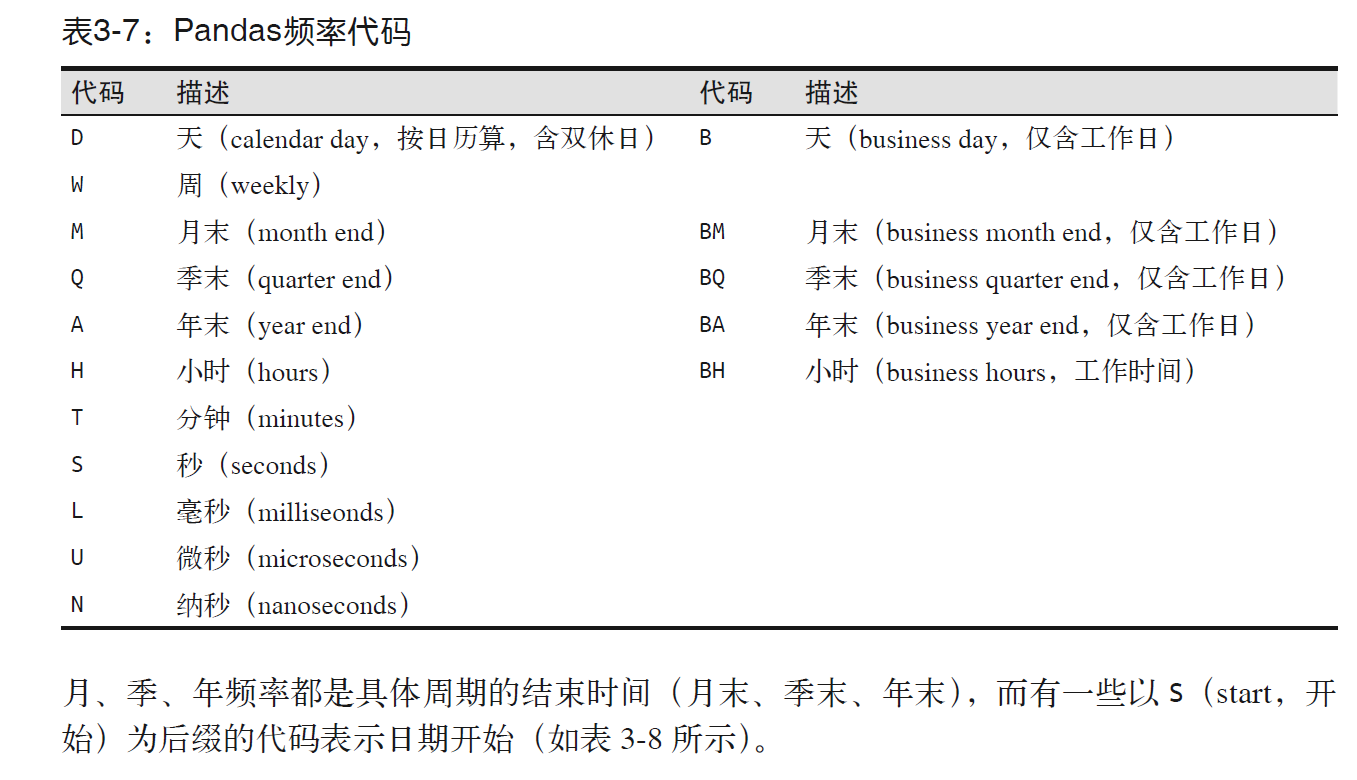

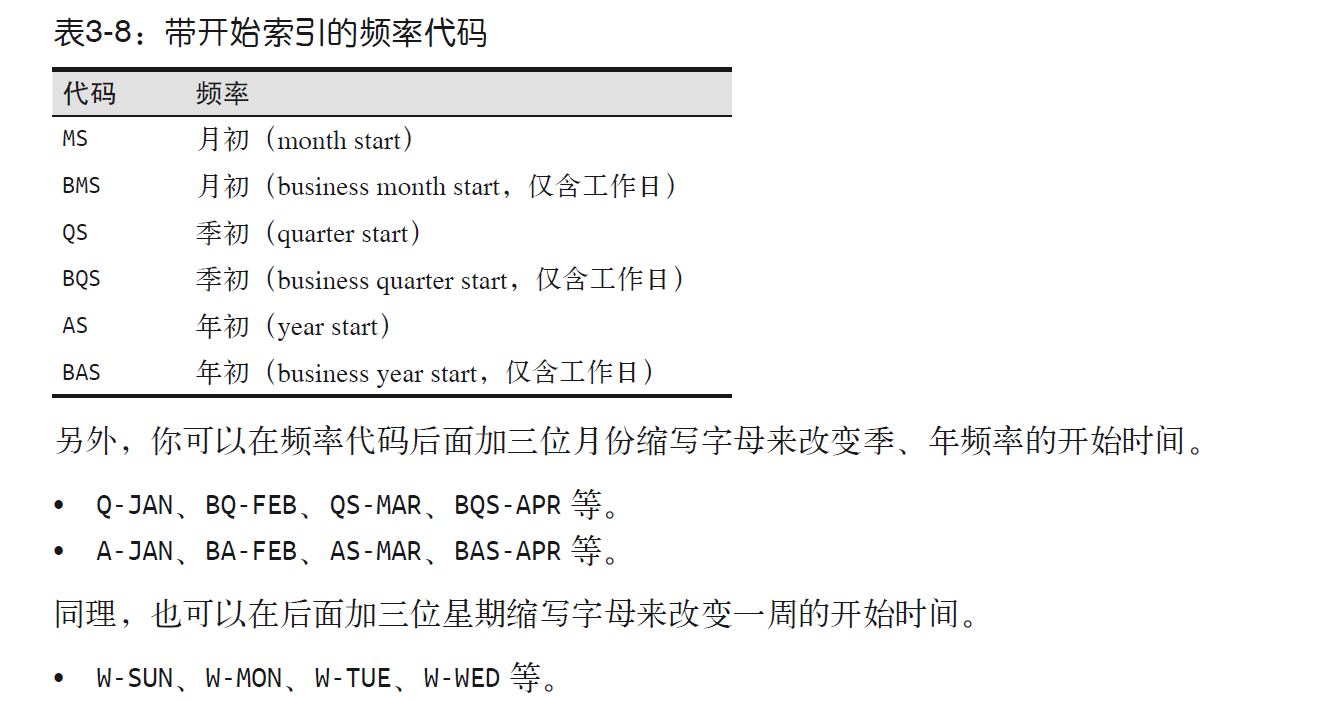

In [323]:
#用小时（H）和分钟（T）的组合来实现2小时30分钟

pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [324]:
#创建一个工作日偏移序列

from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## 重新取样、迁移和窗口

In [3]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
import warnings
warnings.filterwarnings("ignore")

In [364]:
#股票代码、起止日期可替换

caixin = ts.get_hist_data('600633', start='2019-09-01', end='2022-2-28') 
caixin.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2022-03-09,8.80,9.26,9.20,8.50,586621.44,0.37,4.19,8.932,9.146,9.552,427222.79,471449.77,643636.59,4.63
2022-03-08,8.72,9.04,8.83,8.58,489427.06,0.09,1.03,8.950,9.258,9.570,365021.58,486580.12,664650.24,3.87
2022-03-07,8.88,8.98,8.74,8.68,274997.75,-0.13,-1.47,9.062,9.401,9.580,341220.55,532749.38,680778.11,2.17
2022-03-04,8.97,9.04,8.87,8.77,383676.22,-0.15,-1.66,9.204,9.593,9.572,369324.23,634778.28,706204.07,3.03
2022-03-03,9.32,9.36,9.02,8.98,401391.47,-0.27,-2.91,9.306,9.716,9.560,399040.77,676143.91,752955.86,3.17


In [365]:
caixin['date'] = caixin.index #将原来的日期索引变成列
caixin.index = range(len(caixin.index)) #重新设置一个由数构成的索引
caixin.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,date
0,8.80,9.26,9.20,8.50,586621.44,0.37,4.19,8.932,9.146,9.552,427222.79,471449.77,643636.59,4.63,2022-03-09
1,8.72,9.04,8.83,8.58,489427.06,0.09,1.03,8.950,9.258,9.570,365021.58,486580.12,664650.24,3.87,2022-03-08
2,8.88,8.98,8.74,8.68,274997.75,-0.13,-1.47,9.062,9.401,9.580,341220.55,532749.38,680778.11,2.17,2022-03-07
3,8.97,9.04,8.87,8.77,383676.22,-0.15,-1.66,9.204,9.593,9.572,369324.23,634778.28,706204.07,3.03,2022-03-04
4,9.32,9.36,9.02,8.98,401391.47,-0.27,-2.91,9.306,9.716,9.560,399040.77,676143.91,752955.86,3.17,2022-03-03


In [366]:
#调整'date'列的位置，让这一列到最前面

df_id=caixin['date']  
caixin = caixin.drop('date',axis=1)
caixin.insert(0,'date',df_id)
caixin.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,2022-03-09,8.80,9.26,9.20,8.50,586621.44,0.37,4.19,8.932,9.146,9.552,427222.79,471449.77,643636.59,4.63
1,2022-03-08,8.72,9.04,8.83,8.58,489427.06,0.09,1.03,8.950,9.258,9.570,365021.58,486580.12,664650.24,3.87
2,2022-03-07,8.88,8.98,8.74,8.68,274997.75,-0.13,-1.47,9.062,9.401,9.580,341220.55,532749.38,680778.11,2.17
3,2022-03-04,8.97,9.04,8.87,8.77,383676.22,-0.15,-1.66,9.204,9.593,9.572,369324.23,634778.28,706204.07,3.03
4,2022-03-03,9.32,9.36,9.02,8.98,401391.47,-0.27,-2.91,9.306,9.716,9.560,399040.77,676143.91,752955.86,3.17


In [367]:
#将原来倒序的日期重新排序

caixin.sort_values(by=['date'], ascending=True, inplace=True)
caixin.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
603,2019-09-09,9.23,9.31,9.31,9.13,66158.44,0.16,1.75,9.310,9.310,9.310,66158.44,66158.44,66158.44,0.51
602,2019-09-10,9.31,9.35,9.20,9.17,49639.03,-0.11,-1.18,9.255,9.255,9.255,57898.74,57898.74,57898.74,0.38
601,2019-09-11,9.30,9.30,9.15,9.13,43193.65,-0.05,-0.54,9.220,9.220,9.220,52997.04,52997.04,52997.04,0.33
600,2019-09-12,9.16,9.20,9.15,9.06,38443.66,0.00,0.00,9.203,9.203,9.203,49358.70,49358.70,49358.70,0.30
599,2019-09-16,9.16,9.28,9.18,9.12,43447.83,0.03,0.33,9.198,9.198,9.198,48176.52,48176.52,48176.52,0.34


In [368]:
#查看date列的数据，是字符串格式

type(caixin['date'][78])

str

In [371]:
#将年月日的格式转化为年月，并重新将索引设置为日期
#第一步，将字符串格式的date列，转化为日期格式，再将其转化为年月格式的字符串格式并返回到列表中

timenot = pd.to_datetime(caixin['date'])
timeyes=timenot.dt.strftime("%Y-%m")
caixin.index=timeyes

In [372]:
caixin=caixin['close'] #收盘价

<AxesSubplot:xlabel='date'>

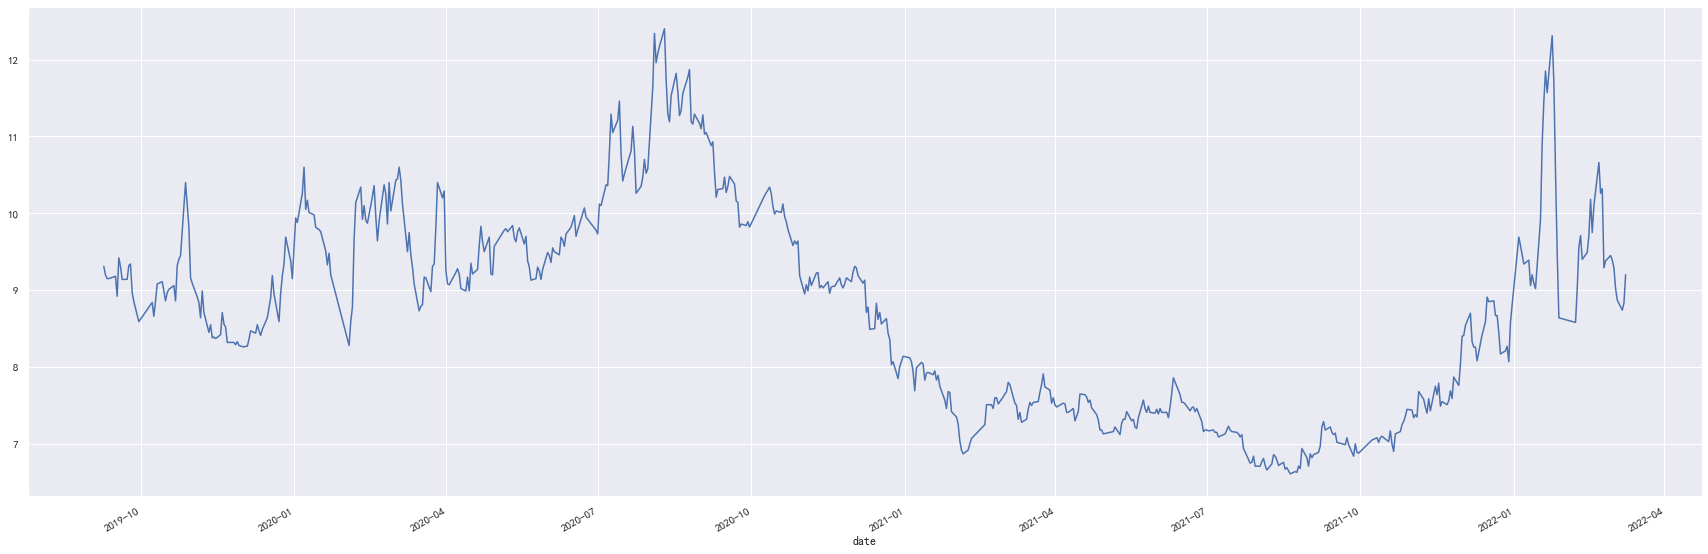

In [386]:
caixin.plot(figsize=(30, 10))

### 重新取样与频率转换

**重新采样（Resampling）：重新采样是值将时间序列从一个频率转换为另一个频率的过程，将更高频率的数据聚合到低频率被称为向下采样（downsampling），而从低频率转换为高频率被称为向上采样（upsampling），还有一种是同频之间的切换，比如W-WED(weekly on Wednesday 每周三)转换到W-FRI(每周五）**

**Series.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', 
kind=None, loffset=None, limit=None, base=0, on=None, level=None)**

**DataFrame.asfreq(freq, method=None, how=None, normalize=False, fill_value=None)**

In [43]:
#按照1分钟为频率生成几个时间戳数据

index = pd.date_range('1/1/2000',periods=9,freq='T')
series = pd.Series(range(9),index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [42]:
#向下采集，以3分钟为频率,并把时间戳的合计值放在一个bin（可以翻译为箱子）里面

series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [31]:
#向下采集，3分钟为频率，并减去一秒

series.resample('3T',loffset='-1s').sum()

1999-12-31 23:59:59     3
2000-01-01 00:02:59    12
2000-01-01 00:05:59    21
Freq: 3T, dtype: int64

In [44]:
index = pd.date_range('1/1/2000', periods=4, freq='T')
series = pd.Series([0.0, None, 2.0, 3.0], index=index)
df = pd.DataFrame({'s': series})
df

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [47]:
df.asfreq(freq='30S') #Upsample the series into 30 second bins.

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,NaN
2000-01-01 00:03:00,3.0


In [48]:
df.asfreq(freq='2T') #Downsample the series into 2 min bins.

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:02:00,2.0


**填充缺失值的本质是：当提高频率时，时间间隔被细化了，那么需要用附近整点的数据填充细化的时间间隔的数据**

In [54]:
df.asfreq(freq='30S', method='bfill') #向后填充缺失值

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,2.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,3.0
2000-01-01 00:03:00,3.0


In [55]:
df.asfreq(freq='30S', method='ffill') #向前填充缺失值

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,2.0
2000-01-01 00:03:00,3.0


In [172]:
caixin = ts.get_hist_data('600633', start='2019-09-01', end='2022-2-28') 
caixin.index = pd.to_datetime(caixin.index) #将索引格式设置为datetime
caixin=caixin['close']

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


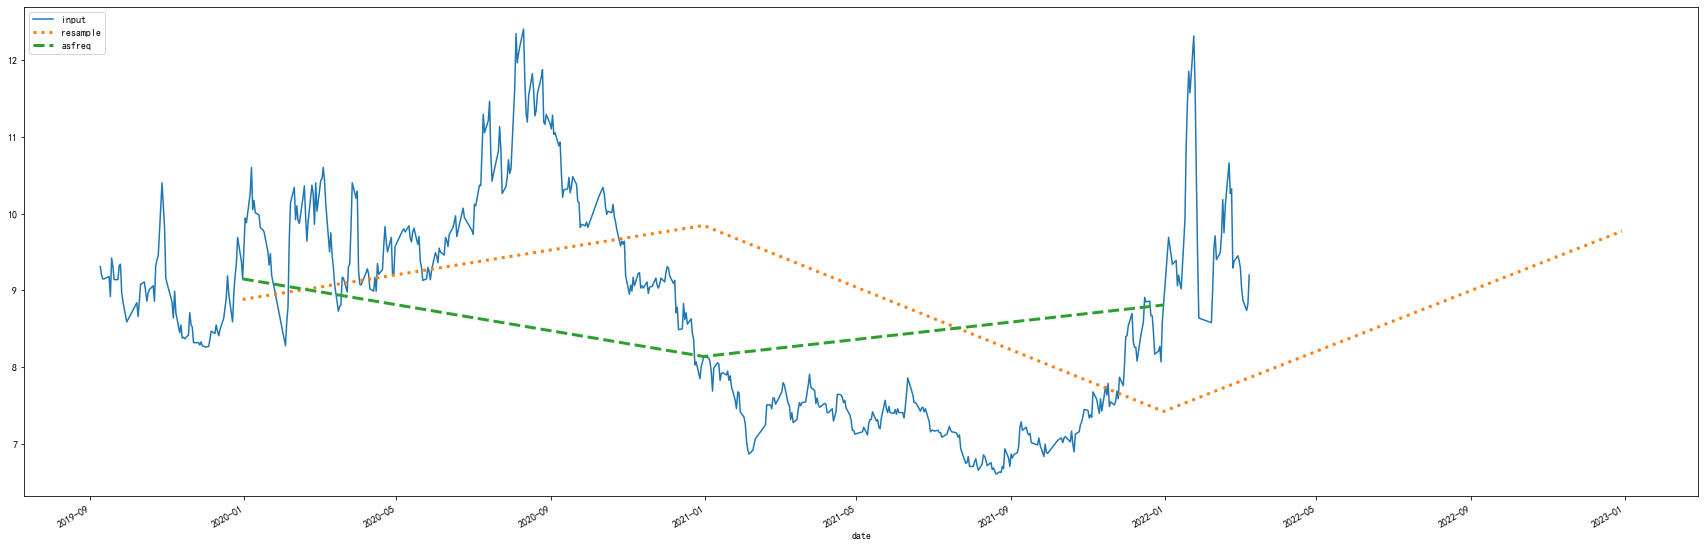

In [173]:
caixin.plot(figsize=(30, 10))#定制画布
#'BA'：年末的工作日

caixin.resample('BA').mean().plot(style=':',linewidth=3) #resample反映的是上一年的均值
caixin.asfreq('BA').plot(style='--',linewidth=3) #asfreq反映的是上一年最后一个工作日的收盘价

plt.legend(['input', 'resample', 'asfreq'],loc='upper left')#画出图例

In [40]:
caixin = caixin.iloc[:10]
caixin

date
2022-03-09    9.20
2022-03-08    8.83
2022-03-07    8.74
2022-03-04    8.87
2022-03-03    9.02
2022-03-02    9.29
2022-03-01    9.39
2022-02-28    9.45
2022-02-25    9.38
2022-02-24    9.29
Name: close, dtype: float64

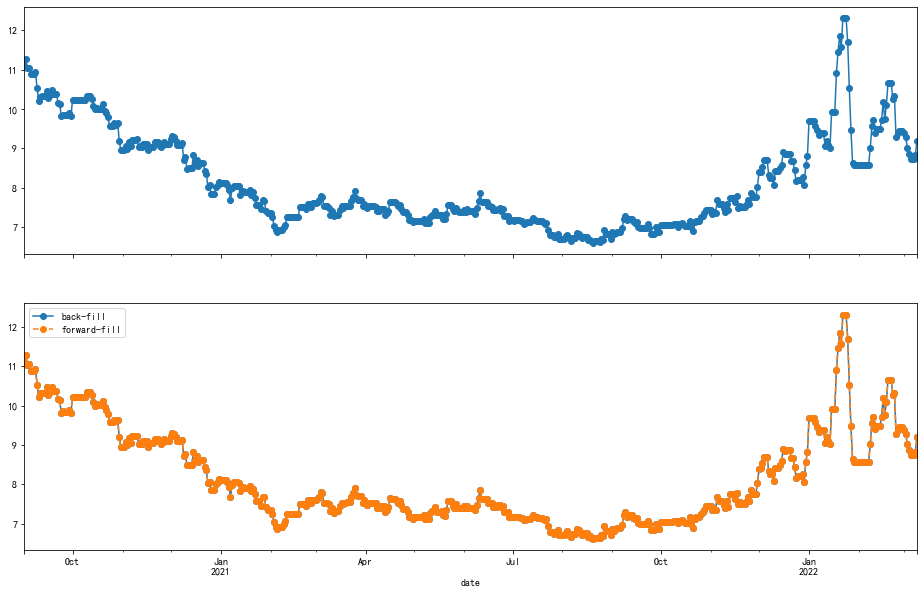

In [96]:
#上面那幅图是原始数据：非工作日的股价是缺失值，所以不会出现在图上
#而下面那幅图通过向前填充与向后填充这两种方法填补了缺失值
#从下面那幅图黄线和蓝线的差别可以看出来向前填充缺失值和向后填充缺失值的差别

fig, ax = plt.subplots(2, sharex=True,figsize=(16,10))
caixin.asfreq('D').plot(ax=ax[0], marker='o')
caixin.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') #向后填充(back-fill)
caixin.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') #向前填充（forward-fill）
ax[1].legend(["back-fill", "forward-fill"]) #设置图例

### 时间迁移

另一种常用的时间序列操作是对数据按时间进行迁移。Pandas 有两种解决这类问题的方法：**shift() 和tshift()**。简单来说，**shift() 就是迁移数据**，而**tshift() 就是迁移索引。**两种方法都是按照频率代码进行迁移。

**shift() 就是迁移数据**，而**tshift() 就是迁移索引。**

In [131]:
import numpy as np
import pandas as pd
import datetime
df = pd.DataFrame(np.arange(16).reshape(4,4),columns=['AA','BB','CC','DD'],index =pd.date_range('6/1/2012','6/4/2012'))
df

,AA,BB,CC,DD
2012-06-01,0,1,2,3
2012-06-02,4,5,6,7
2012-06-03,8,9,10,11
2012-06-04,12,13,14,15


In [132]:
#迁移数据

df.shift(2)

,AA,BB,CC,DD
2012-06-01,NaN,NaN,NaN,NaN
2012-06-02,NaN,NaN,NaN,NaN
2012-06-03,0.0,1.0,2.0,3.0
2012-06-04,4.0,5.0,6.0,7.0


In [126]:
df.shift(2,axis = 1)

,AA,BB,CC,DD
2012-06-01,NaN,NaN,0,1
2012-06-02,NaN,NaN,4,5
2012-06-03,NaN,NaN,8,9
2012-06-04,NaN,NaN,12,13


In [146]:
#迁移索引

df.tshift(-50)

,AA,BB,CC,DD
2012-04-12,0,1,2,3
2012-04-13,4,5,6,7
2012-04-14,8,9,10,11
2012-04-15,12,13,14,15


In [182]:
caixin = ts.get_hist_data('600633', start='2019-09-01', end='2020-09-01') 
caixin.index = pd.to_datetime(caixin.index) #将索引格式设置为datetime
caixin=caixin['close']

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


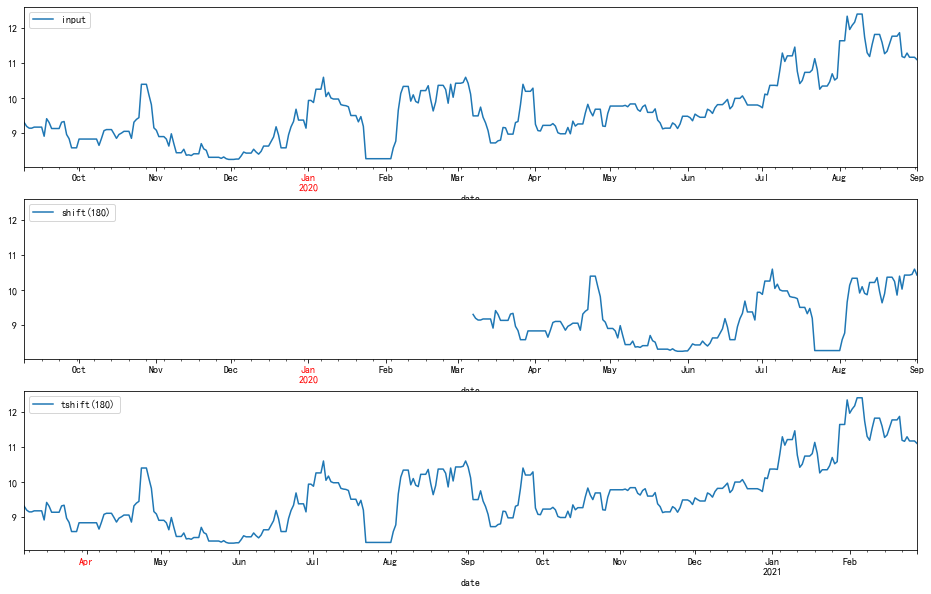

In [183]:
# 用shift()和tshift()这两种方法让数据迁移180 天

fig, ax = plt.subplots(3, sharey=True)

# 对数据应用时间频率，用向后填充解决缺失值
caixin = caixin.asfreq('D', method='pad')
caixin.plot(ax=ax[0],figsize=(16,10))
caixin.shift(180).plot(ax=ax[1]) #将数据统一移到180天后，于是前面的数据被移走了，出现了断层
caixin.tshift(180).plot(ax=ax[2]) #将索引移到180天之后，于是数据没变，但是索引变了

# 设置图例与标签
local_max = pd.to_datetime('2021-09-01')
offset = pd.Timedelta(180, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(180)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(180)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

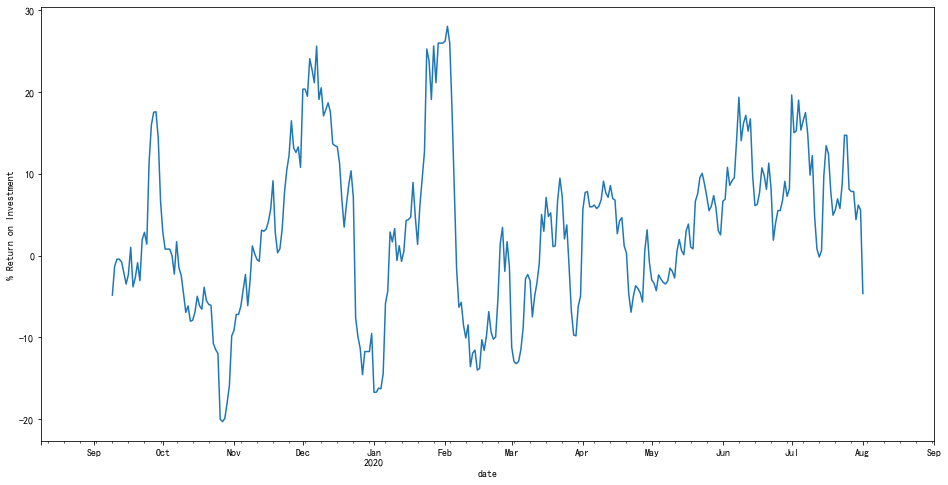

In [186]:
#计算caixin股票一月期的投资回报率

ROI = 100 * (caixin.tshift(-31) / caixin - 1)
ROI.plot(figsize=(16,8))
plt.ylabel('% Return on Investment');

### 移动时间窗口

移动统计值（rolling statistics）可以通过 **rolling()** 来实现，它会返回与groupby 操作类似的结果，使得许多累计操作成为可能

pandas rolling()官方文档：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [26]:
# window:时间窗的大小,数值int,即向前几个数据(可以理解将最近的几个值进行group by)

import pandas as pd
import numpy as np

# 创建df
df = pd.DataFrame(np.random.randint(5, size=(10, 2)), index=pd.date_range('1/1/2020', periods=10), columns=['A', 'B'])

# 将B列最近2个值相加并生成新列
df['C'] = df['B'].rolling(2).sum()
# 将B列最近5个值相加并生成新列
df['D'] = df['B'].rolling(5).sum()
# 将B列最近2个值求平均并生成新列
df['E'] = df['B'].rolling(2).mean()
# 将B列最近5个值求平均并生成新列
df['F'] = df['B'].rolling(5).mean()

df

,A,B,C,D,E,F
2020-01-01,0,2,NaN,NaN,NaN,NaN
2020-01-02,0,1,3.0,NaN,1.5,NaN
2020-01-03,4,4,5.0,NaN,2.5,NaN
2020-01-04,0,0,4.0,NaN,2.0,NaN
2020-01-05,2,1,1.0,8.0,0.5,1.6
2020-01-06,1,4,5.0,10.0,2.5,2.0
2020-01-07,4,0,4.0,9.0,2.0,1.8
2020-01-08,3,2,2.0,7.0,1.0,1.4
2020-01-09,1,3,5.0,10.0,2.5,2.0
2020-01-10,0,2,5.0,11.0,2.5,2.2


In [6]:
caixin = ts.get_hist_data('600633', start='2019-09-01', end='2020-09-01') 
caixin.index = pd.to_datetime(caixin.index) #将索引格式设置为datetime
caixin=caixin['close']

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


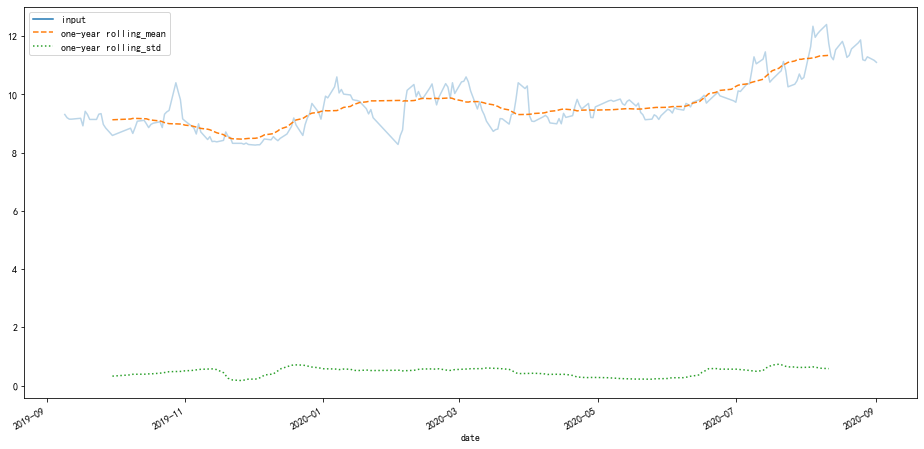

In [27]:
#通过下面的代码获取caixin股票收盘价的一月期移动平均值和标准差

rolling = caixin.rolling(30, center=True)
data = pd.DataFrame({'input': caixin,'one-year rolling_mean': rolling.mean(),'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'],figsize=(16,8))
ax.lines[0].set_alpha(0.3)

## 美国西雅图自行车统计数据的可视化

In [28]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'FremontBridge.csv'